In [1]:
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
import orbit
print(orbit.__version__)

1.1.4.9


In [3]:
from orbit.eda import eda_plot

import orbit.constants.palette as palette
from orbit.utils.plot import get_orbit_style

from orbit.models import ETS
from orbit.diagnostics.plot import plot_predicted_data

In [4]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [5]:
from ipywidgets import FloatProgress

In [6]:
from orbit.models import DLT, KTR

In [7]:
day = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\orbitml\\data\\day_clean.csv')
week = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\orbitml\\data\\week_clean.csv')
month = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\orbitml\\data\\month_clean.csv')
hour = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\orbitml\\data\\hour_clean.csv')

In [8]:
alxm = pd.DataFrame(month, columns=['ds', 'alx'])
gcom = pd.DataFrame(month, columns=['ds', 'gco'])
mcom = pd.DataFrame(month, columns=['ds', 'mco'])

alxw = pd.DataFrame(week, columns=['ds', 'alx'])
gcow = pd.DataFrame(week, columns=['ds', 'gco'])
mcow = pd.DataFrame(week, columns=['ds', 'mco'])

alxd = pd.DataFrame(day, columns=['ds', 'alx'])
gcod = pd.DataFrame(day, columns=['ds', 'gco'])
mcod = pd.DataFrame(day, columns=['ds', 'mco'])

alxh = pd.DataFrame(hour, columns=['ds', 'alx'])
gcoh = pd.DataFrame(hour, columns=['ds', 'gco'])
mcoh = pd.DataFrame(hour, columns=['ds', 'mco'])

In [9]:
alxh['ds'] = pd.to_datetime(alxh['ds'])
gcoh['ds'] = pd.to_datetime(gcoh['ds'])
mcoh['ds'] = pd.to_datetime(mcoh['ds'])
alxd['ds'] = pd.to_datetime(alxd['ds'])
gcod['ds'] = pd.to_datetime(gcod['ds'])
mcod['ds'] = pd.to_datetime(mcod['ds'])
alxw['ds'] = pd.to_datetime(alxw['ds'])
gcow['ds'] = pd.to_datetime(gcow['ds'])
mcow['ds'] = pd.to_datetime(mcow['ds'])
alxm['ds'] = pd.to_datetime(alxm['ds'])
gcom['ds'] = pd.to_datetime(gcom['ds'])
mcom['ds'] = pd.to_datetime(mcom['ds'])

In [10]:
import pmdarima

In [49]:
tr_alxm = alxm[:48]
tst_alxm = alxm[48:]

tr_gcom = gcom[:48]
tst_gcom = gcom[48:]

tr_mcom = mcom[:48]
tst_mcom = mcom[48:]

tr_alxw = alxw[:209]
tst_alxw = alxw[209:]

tr_gcow = gcow[:209]
tst_gcow = gcow[209:]

tr_mcow = mcow[:209]
tst_mcow = mcow[209:]

tr_alxd = alxd[:365]
tst_alxd = alxd[365:]

tr_gcod = gcod[:365]
tst_gcod = gcod[365:]

tr_mcod = mcod[:365]
tst_mcod = mcod[365:]

tr_alxh = alxh[:2184]
tst_alxh = alxh[2184:]

tr_gcoh = gcoh[:2184]
tst_gcoh = gcoh[2184:]

tr_mcoh = mcoh[:2184]
tst_mcoh = mcoh[2184:]

In [12]:
alxm_ets = ETS(
    response_col = 'alx',
    date_col = 'ds',
    seasonality=12,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

In [13]:
%%time
alxm_ets.fit(df=tr_alxm)

2024-08-01 10:07:37 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


CPU times: total: 500 ms
Wall time: 1.29 s


In [14]:
predicted_alxm_ets = alxm_ets.predict(df=tst_alxm)

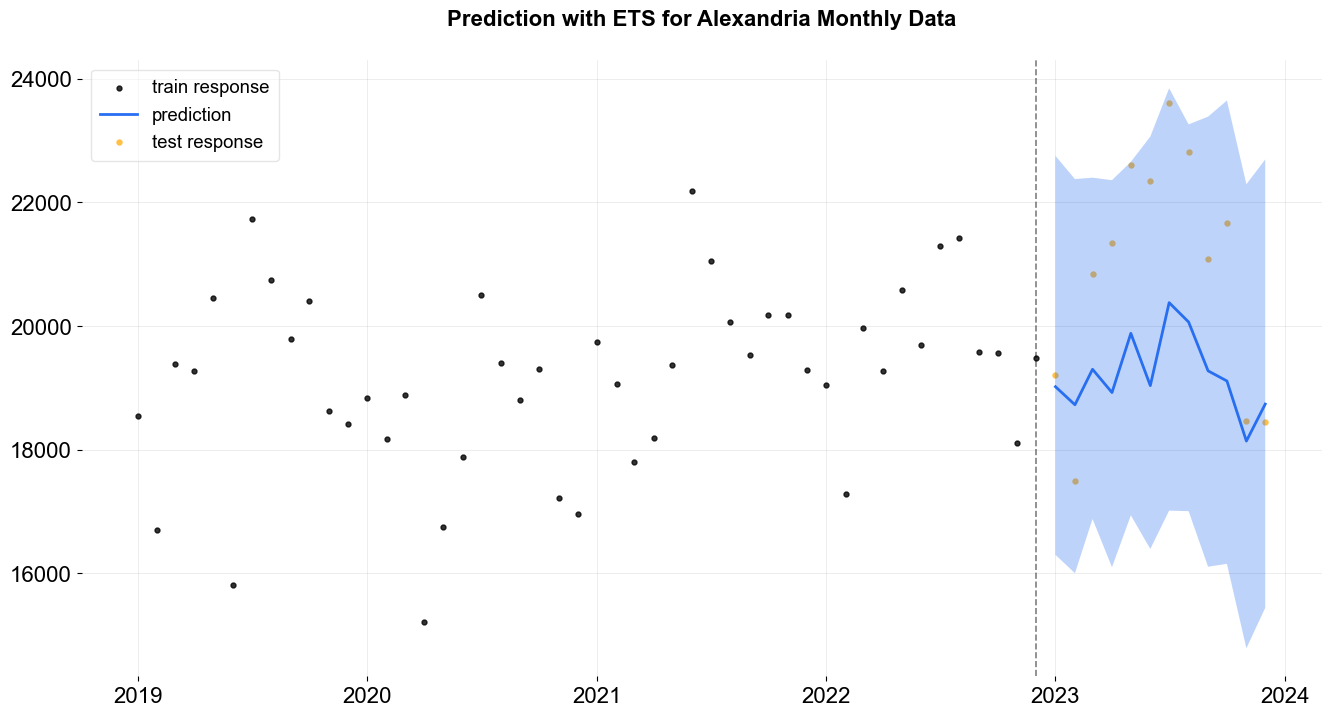

In [15]:
_ = plot_predicted_data(tr_alxm, predicted_alxm_ets, 'ds', 'alx', test_actual_df = tst_alxm, title='Prediction with ETS for Alexandria Monthly Data')

In [16]:
predicted_alxm_ets.tail()

,ds,prediction_5,prediction,prediction_95
7,2023-08-01,17004.559621,20063.277998,23259.729525
8,2023-09-01,16106.687507,19273.665424,23385.000610
9,2023-10-01,16152.472380,19109.989013,23645.986859
10,2023-11-01,14787.158341,18138.328009,22291.848602
11,2023-12-01,15441.631064,18736.046741,22692.589994


In [17]:
alxm_dlt = DLT(
    response_col = 'alx',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=12,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

2024-08-01 10:07:38 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


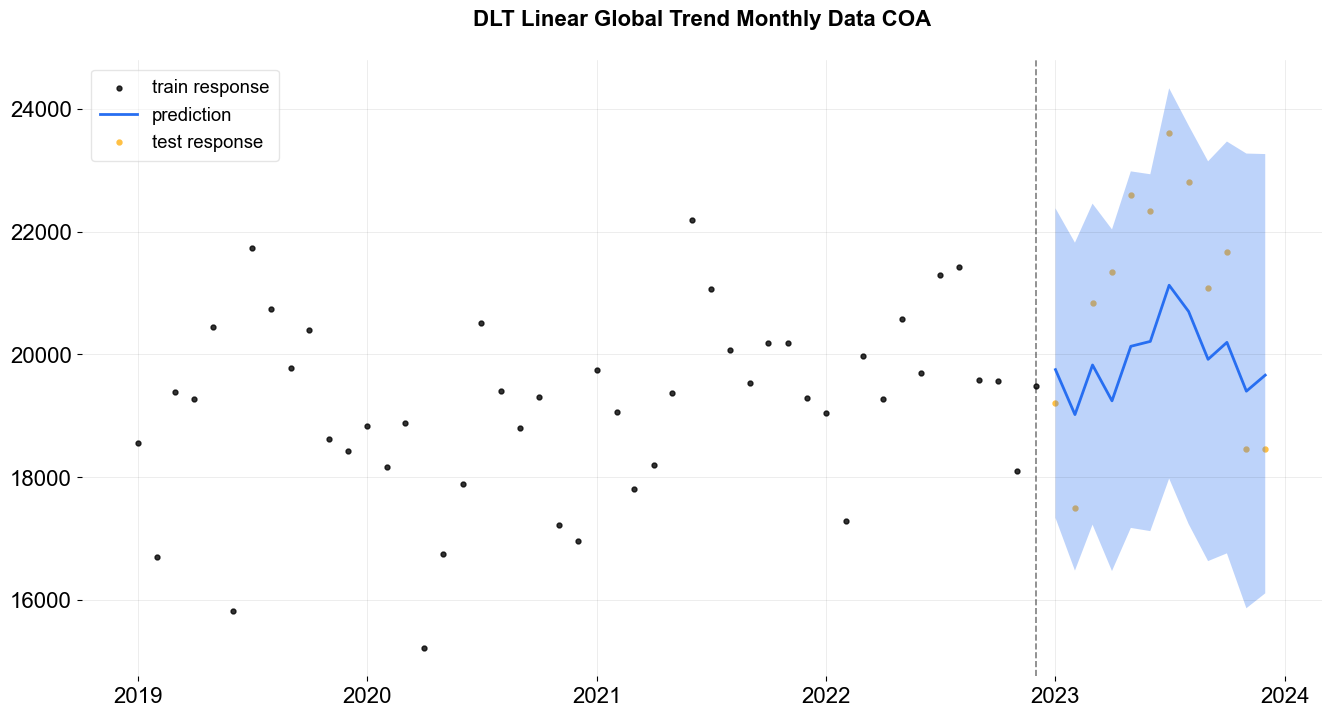

CPU times: total: 1 s
Wall time: 2.83 s


In [18]:
%%time
alxm_dlt.fit(df=tr_alxm)
predicted_alxm_dlt = alxm_dlt.predict(tst_alxm)
_ = plot_predicted_data(tr_alxm, predicted_alxm_dlt, 'ds', 'alx', test_actual_df = tst_alxm, title='DLT Linear Global Trend Monthly Data COA')

In [19]:
gcom_ets = ETS(
    response_col = 'gco',
    date_col = 'ds',
    seasonality=12,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

2024-08-01 10:07:41 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


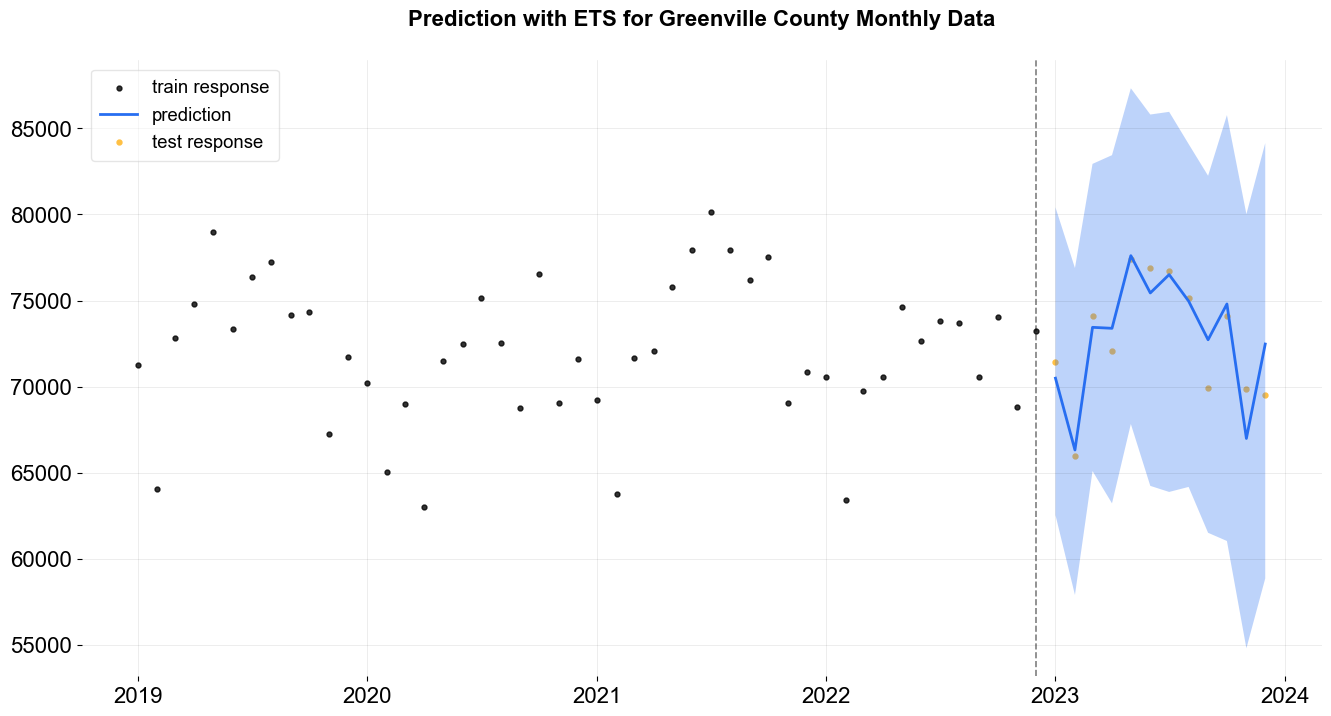

CPU times: total: 453 ms
Wall time: 962 ms


In [20]:
%%time
gcom_ets.fit(df=tr_gcom)

predicted_gcom_ets = gcom_ets.predict(df=tst_gcom)

_ = plot_predicted_data(tr_gcom, predicted_gcom_ets, 'ds', 'gco', test_actual_df = tst_gcom, title='Prediction with ETS for Greenville County Monthly Data')

In [21]:
predicted_gcom_ets.tail()

,ds,prediction_5,prediction,prediction_95
7,2023-08-01,64173.519973,74966.546248,84092.856075
8,2023-09-01,61508.798062,72721.719120,82248.114354
9,2023-10-01,61032.854946,74798.853821,85769.074114
10,2023-11-01,54800.604791,66989.130661,80018.120069
11,2023-12-01,58855.890236,72472.673062,84143.637700


In [22]:
gcom_dlt = DLT(
    response_col = 'gco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=12,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

2024-08-01 10:07:42 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


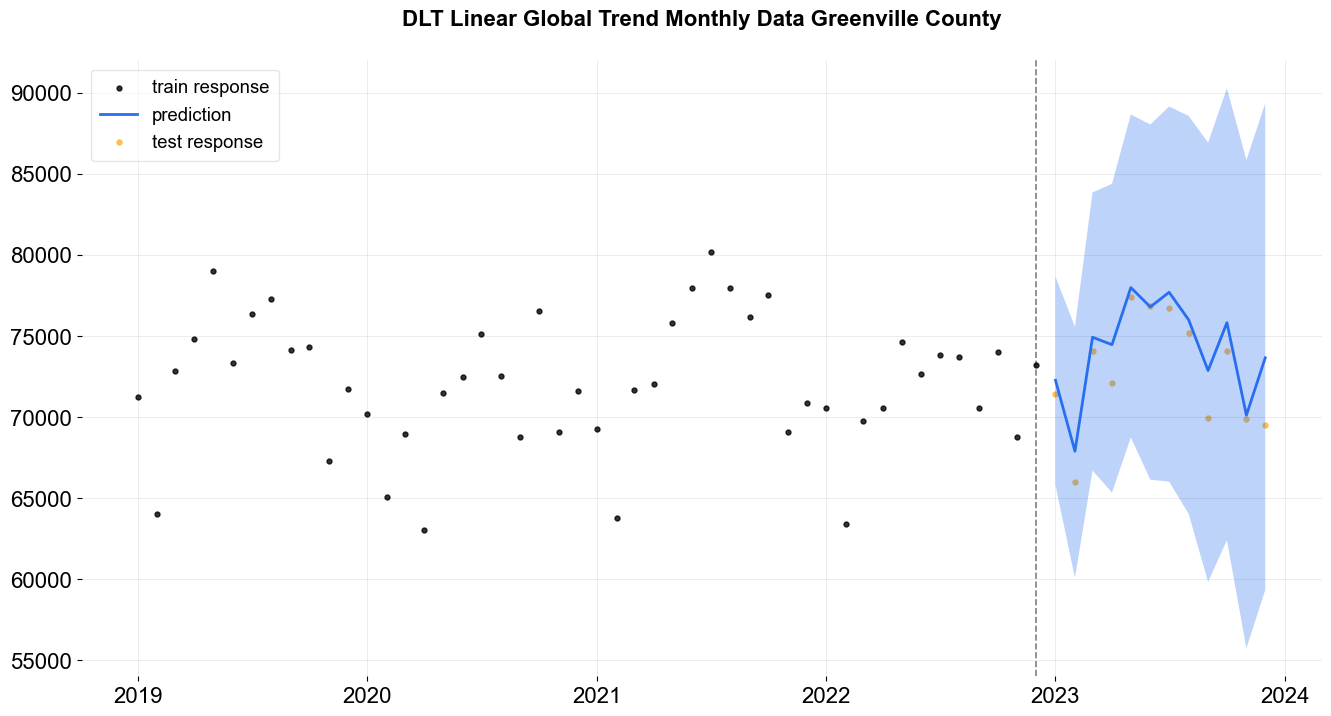

CPU times: total: 906 ms
Wall time: 3.33 s


In [23]:
%%time
gcom_dlt.fit(df=tr_gcom)

predicted_gcom_dlt = gcom_dlt.predict(tst_gcom)

_ = plot_predicted_data(tr_gcom, predicted_gcom_dlt, 'ds', 'gco', test_actual_df = tst_gcom, title='DLT Linear Global Trend Monthly Data Greenville County')

In [24]:
predicted_gcom_dlt.tail()

,ds,prediction_5,prediction,prediction_95
7,2023-08-01,64044.342920,75998.967199,88563.572166
8,2023-09-01,59846.948436,72868.597421,86914.251057
9,2023-10-01,62413.100903,75818.452133,90266.616276
10,2023-11-01,55750.445366,70117.492486,85849.597156
11,2023-12-01,59341.870474,73652.477099,89335.621849


2024-08-01 10:07:46 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


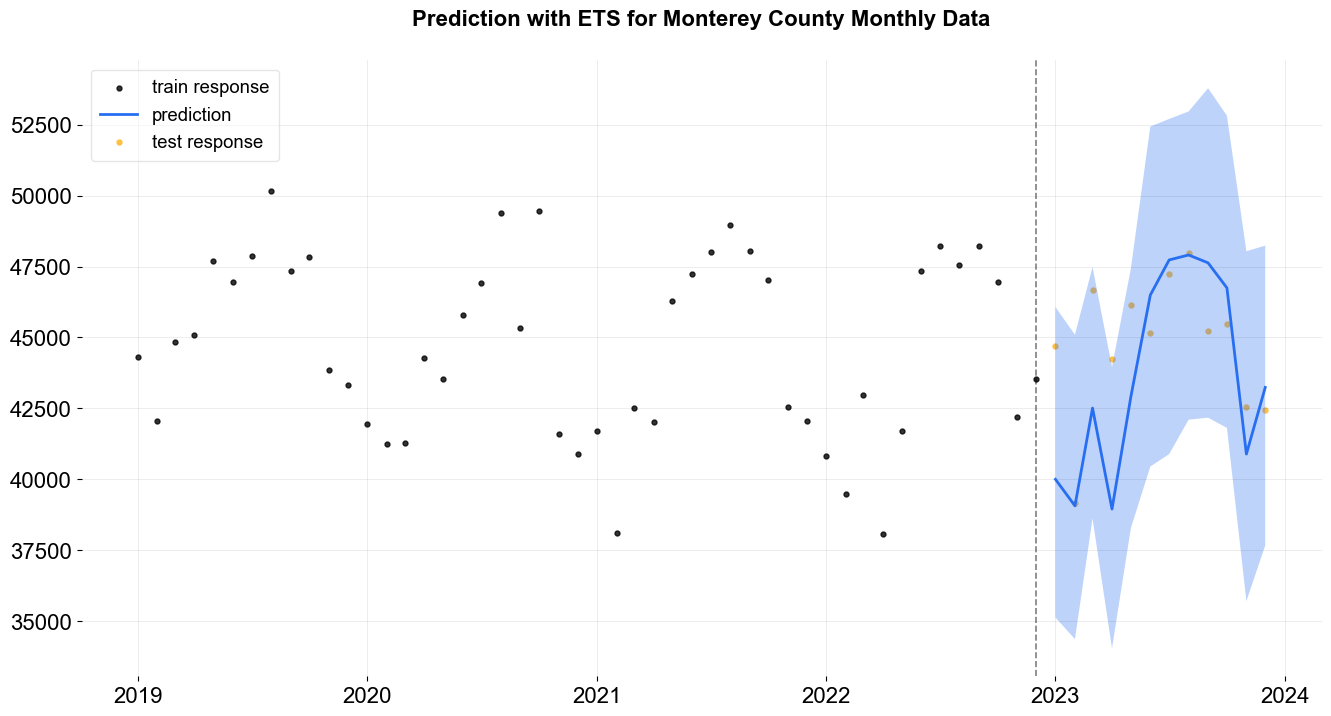

CPU times: total: 484 ms
Wall time: 1.05 s


In [25]:
%%time
mcom_ets = ETS(
    response_col = 'mco',
    date_col = 'ds',
    seasonality=12,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

mcom_ets.fit(df=tr_mcom)

predicted_mcom_ets = mcom_ets.predict(df=tst_mcom)

_ = plot_predicted_data(tr_mcom, predicted_mcom_ets, 'ds', 'mco', test_actual_df = tst_mcom, title='Prediction with ETS for Monterey County Monthly Data')

In [26]:
predicted_mcom_ets.tail()

,ds,prediction_5,prediction,prediction_95
7,2023-08-01,42098.645661,47909.756626,52972.203187
8,2023-09-01,42170.346833,47631.375147,53790.004416
9,2023-10-01,41809.506267,46747.924026,52823.417391
10,2023-11-01,35702.145658,40886.633004,48041.669050
11,2023-12-01,37663.786510,43236.731724,48240.580821


2024-08-01 10:07:47 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


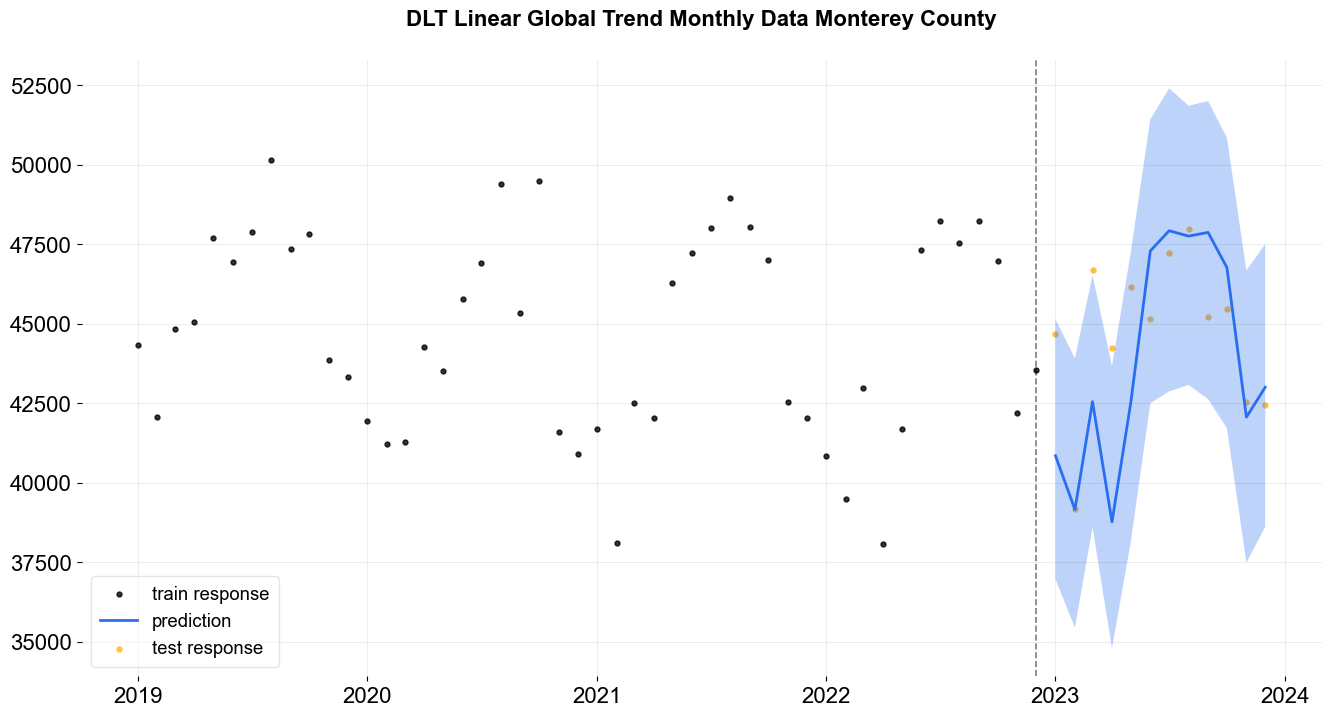

CPU times: total: 656 ms
Wall time: 2.87 s


In [27]:
%%time

mcom_dlt = DLT(
    response_col = 'mco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=12,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

mcom_dlt.fit(df=tr_mcom)

predicted_mcom_dlt = mcom_dlt.predict(tst_mcom)

_ = plot_predicted_data(tr_mcom, predicted_mcom_dlt, 'ds', 'mco', test_actual_df = tst_mcom, title='DLT Linear Global Trend Monthly Data Monterey County')

In [28]:
predicted_mcom_dlt.tail()

,ds,prediction_5,prediction,prediction_95
7,2023-08-01,43081.296378,47760.128049,51860.540522
8,2023-09-01,42631.054698,47876.000805,52007.971198
9,2023-10-01,41718.746680,46769.324189,50851.416069
10,2023-11-01,37486.348317,42065.936393,46680.799777
11,2023-12-01,38615.444805,43007.224546,47511.049068


In [29]:
tr_alxw.head()

,ds,alx
0,2018-12-30,4178
1,2019-01-06,4441
2,2019-01-13,3806
3,2019-01-20,4249
4,2019-01-27,4329


2024-08-01 10:07:49 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


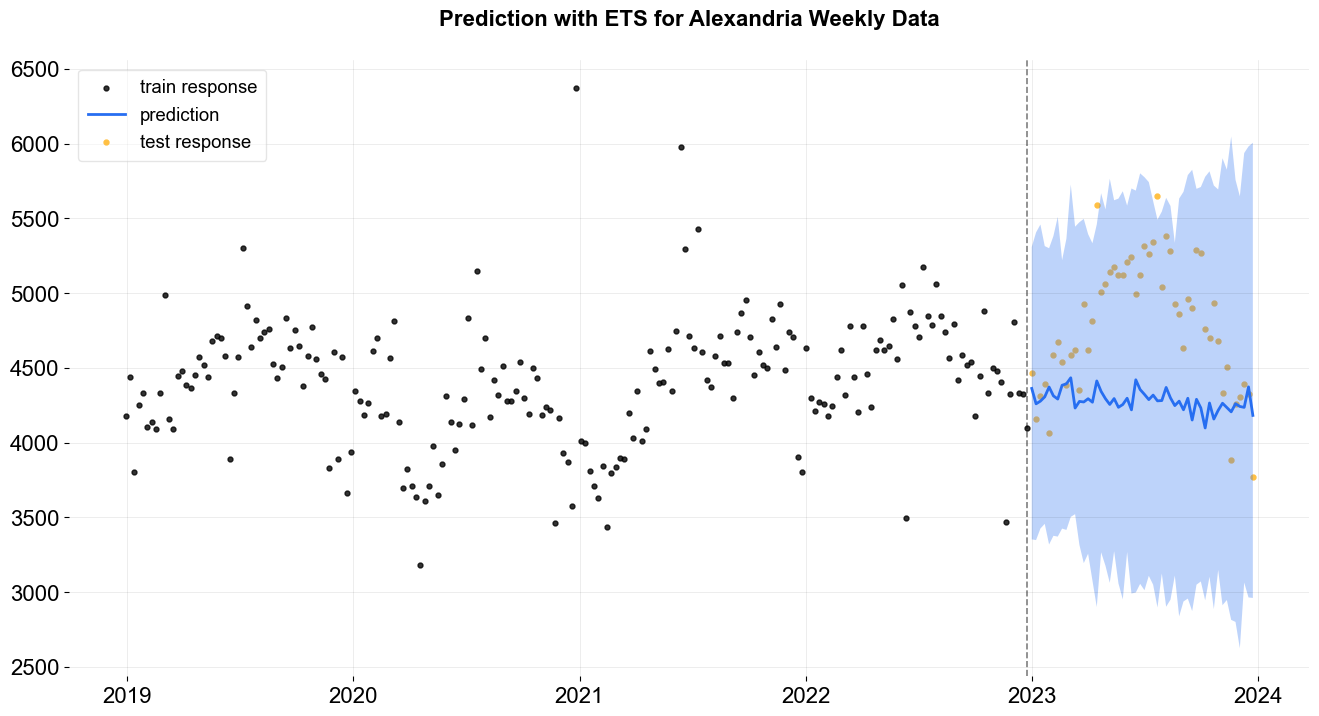

CPU times: total: 672 ms
Wall time: 1.73 s


In [30]:
%%time
alxw_ets = ETS(
    response_col = 'alx',
    date_col = 'ds',
    seasonality=52,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

alxw_ets.fit(df=tr_alxw)

predicted_alxw_ets = alxw_ets.predict(df=tst_alxw)

_ = plot_predicted_data(tr_alxw, predicted_alxw_ets, 'ds', 'alx', test_actual_df = tst_alxw, title='Prediction with ETS for Alexandria Weekly Data')

In [31]:
predicted_alxw_ets.tail()

,ds,prediction_5,prediction,prediction_95
47,2023-11-26,2800.603586,4259.898927,5757.289580
48,2023-12-03,2624.236115,4241.668756,5647.247059
49,2023-12-10,3063.965758,4235.604390,5936.753226
50,2023-12-17,2964.177812,4372.652181,5980.835782
51,2023-12-24,2961.018394,4181.915512,6005.514362


2024-08-01 10:07:51 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


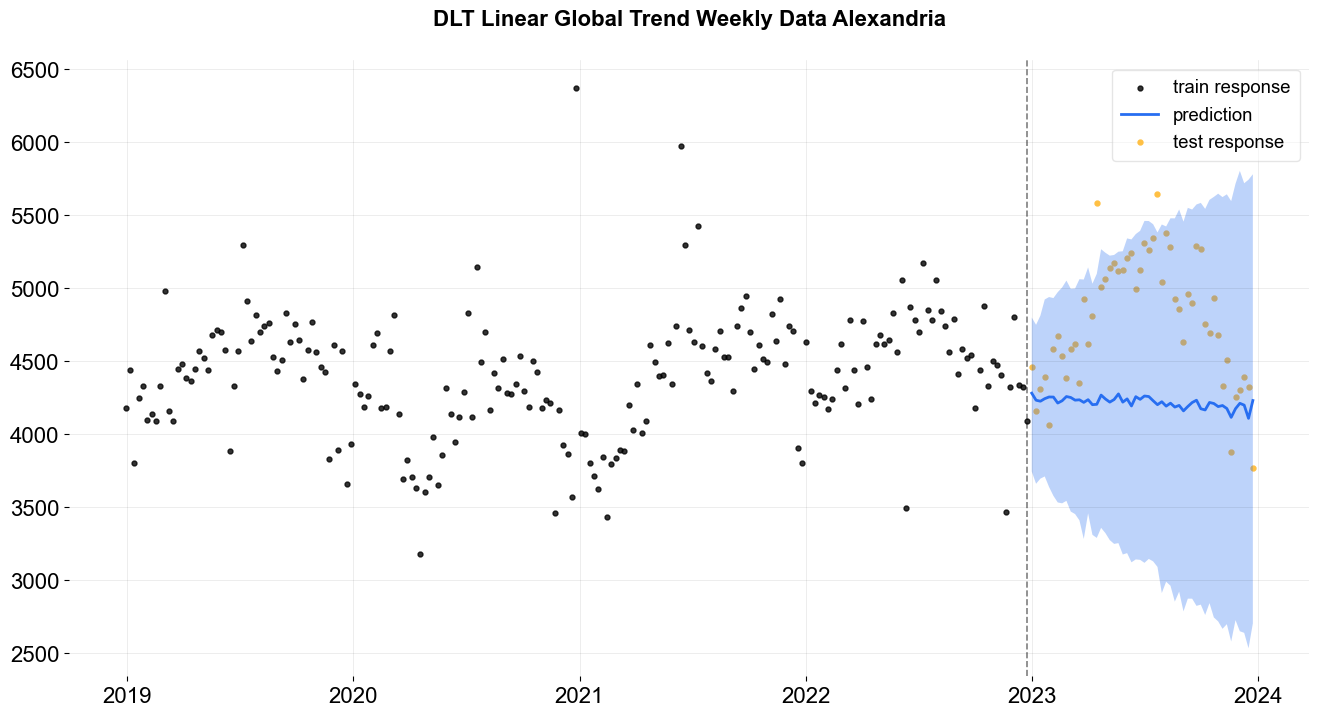

CPU times: total: 1.44 s
Wall time: 5.58 s


In [32]:
%%time

alxw_dlt = DLT(
    response_col = 'alx',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=52,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

alxw_dlt.fit(df=tr_alxw)

predicted_alxw_dlt = alxw_dlt.predict(tst_alxw)

_ = plot_predicted_data(tr_alxw, predicted_alxw_dlt, 'ds', 'alx', test_actual_df = tst_alxw, title='DLT Linear Global Trend Weekly Data Alexandria')

In [33]:
predicted_alxw_dlt.tail()

,ds,prediction_5,prediction,prediction_95
47,2023-11-26,2728.248490,4176.150451,5716.306559
48,2023-12-03,2652.268464,4212.920665,5804.642970
49,2023-12-10,2641.562108,4200.512120,5719.659459
50,2023-12-17,2535.698667,4110.096557,5743.928351
51,2023-12-24,2706.154126,4232.138400,5781.345238


2024-08-01 10:07:57 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


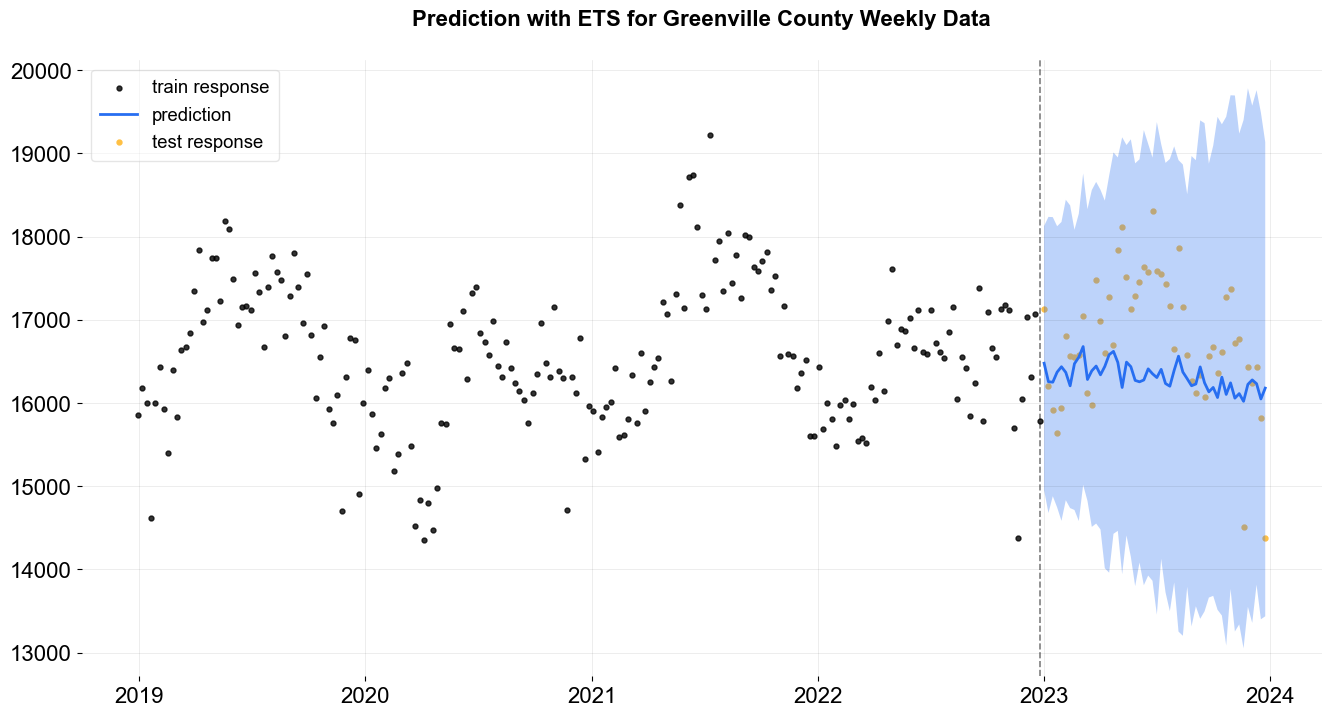

CPU times: total: 484 ms
Wall time: 1.9 s


In [34]:
%%time
gcow_ets = ETS(
    response_col = 'gco',
    date_col = 'ds',
    seasonality=52,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

gcow_ets.fit(df=tr_gcow)

predicted_gcow_ets = gcow_ets.predict(df=tst_gcow)

_ = plot_predicted_data(tr_gcow, predicted_gcow_ets, 'ds', 'gco', test_actual_df = tst_gcow, title='Prediction with ETS for Greenville County Weekly Data')

In [35]:
predicted_gcow_ets.tail()

,ds,prediction_5,prediction,prediction_95
47,2023-11-26,13549.104058,16223.780612,19782.992622
48,2023-12-03,13356.046348,16277.380596,19574.519463
49,2023-12-10,13814.943421,16231.851029,19759.962903
50,2023-12-17,13399.687255,16048.629543,19490.690607
51,2023-12-24,13435.637321,16178.596538,19136.534691


2024-08-01 10:07:59 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


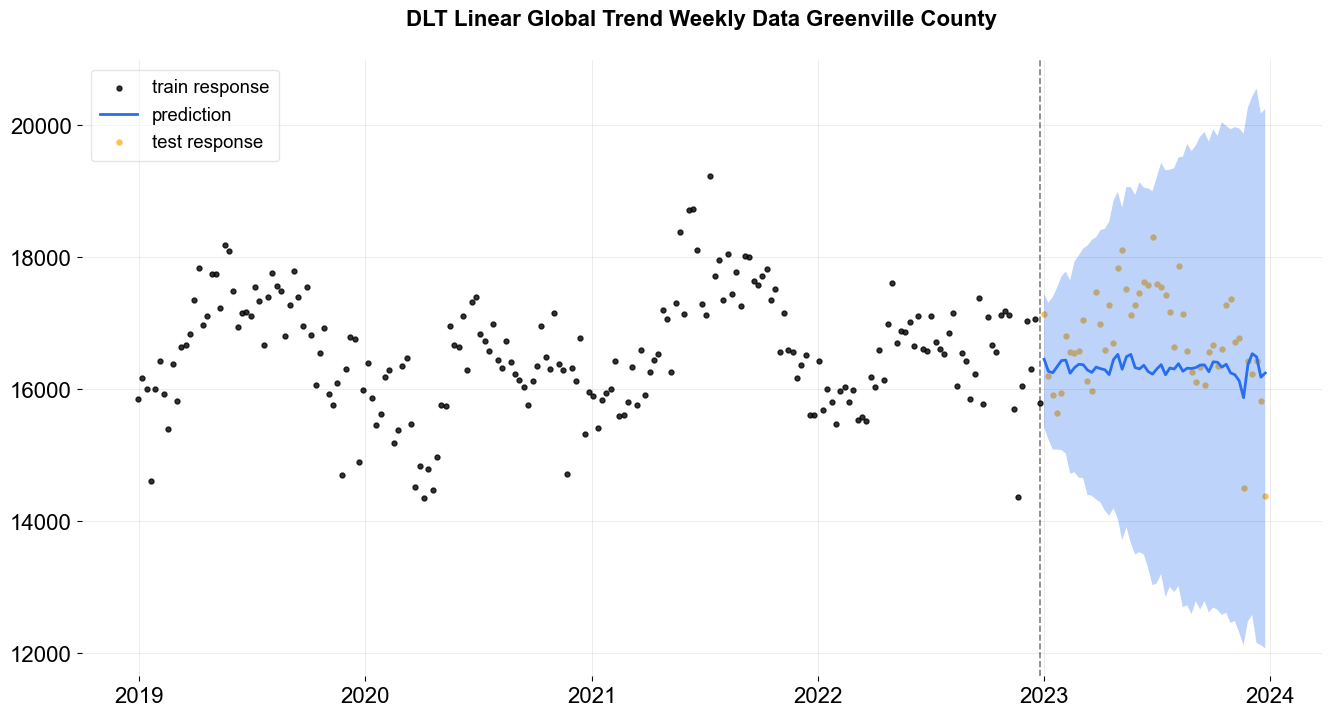

CPU times: total: 969 ms
Wall time: 7.57 s


In [36]:
%%time

gcow_dlt = DLT(
    response_col = 'gco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=52,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

gcow_dlt.fit(df=tr_gcow)

predicted_gcow_dlt = gcow_dlt.predict(tst_gcow)

_ = plot_predicted_data(tr_gcow, predicted_gcow_dlt, 'ds', 'gco', test_actual_df = tst_gcow, title='DLT Linear Global Trend Weekly Data Greenville County')

In [37]:
predicted_gcow_dlt.tail()

,ds,prediction_5,prediction,prediction_95
47,2023-11-26,12484.984668,16371.641039,20266.727745
48,2023-12-03,12585.087804,16539.331190,20432.190629
49,2023-12-10,12159.044246,16492.577311,20558.972037
50,2023-12-17,12125.524423,16184.008430,20176.356879
51,2023-12-24,12078.517673,16246.775531,20246.782043


2024-08-01 10:08:06 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


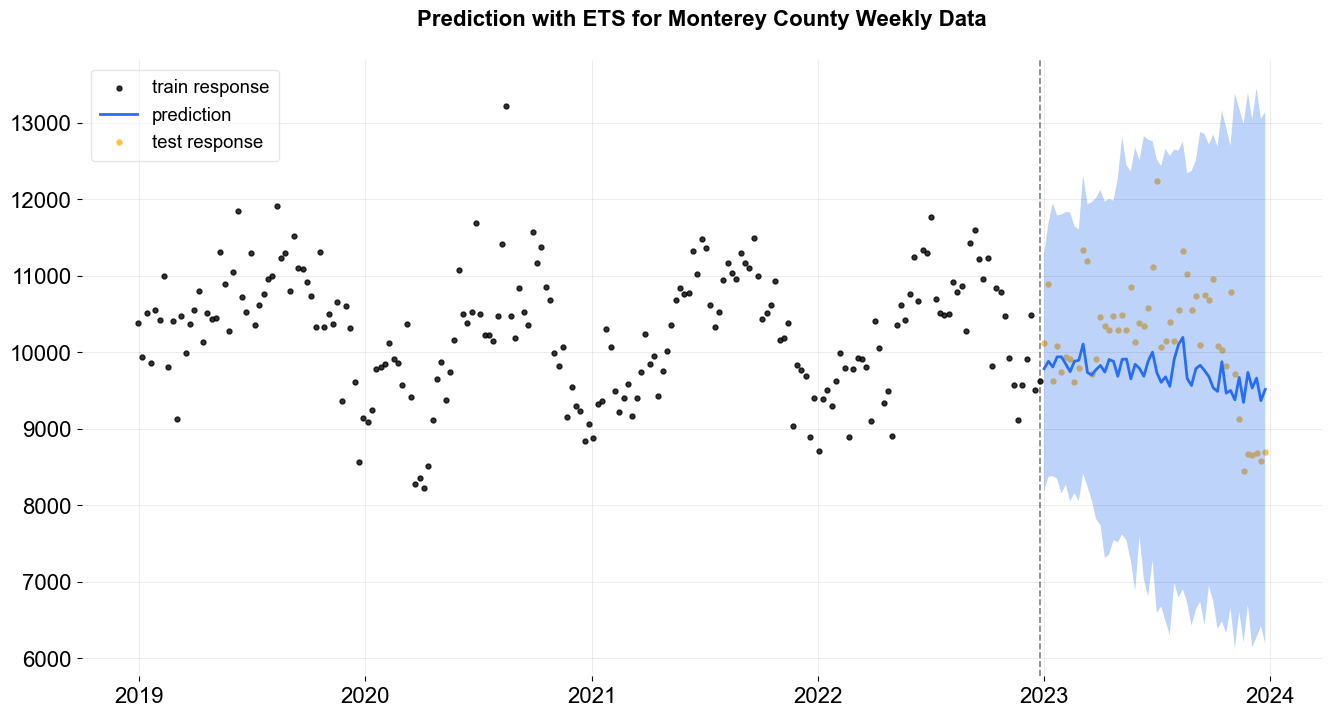

CPU times: total: 547 ms
Wall time: 1.89 s


In [38]:
%%time
mcow_ets = ETS(
    response_col = 'mco',
    date_col = 'ds',
    seasonality=52,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

mcow_ets.fit(df=tr_mcow)

predicted_mcow_ets = mcow_ets.predict(df=tst_mcow)

_ = plot_predicted_data(tr_mcow, predicted_mcow_ets, 'ds', 'mco', test_actual_df = tst_mcow, title='Prediction with ETS for Monterey County Weekly Data')

In [39]:
predicted_mcow_ets.tail()

,ds,prediction_5,prediction,prediction_95
47,2023-11-26,6702.254437,9738.340676,13393.131019
48,2023-12-03,6145.625302,9534.177697,13046.844023
49,2023-12-10,6277.053367,9663.284841,13452.617341
50,2023-12-17,6421.122040,9369.075484,13052.359106
51,2023-12-24,6194.150335,9516.021264,13144.122462


2024-08-01 10:08:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


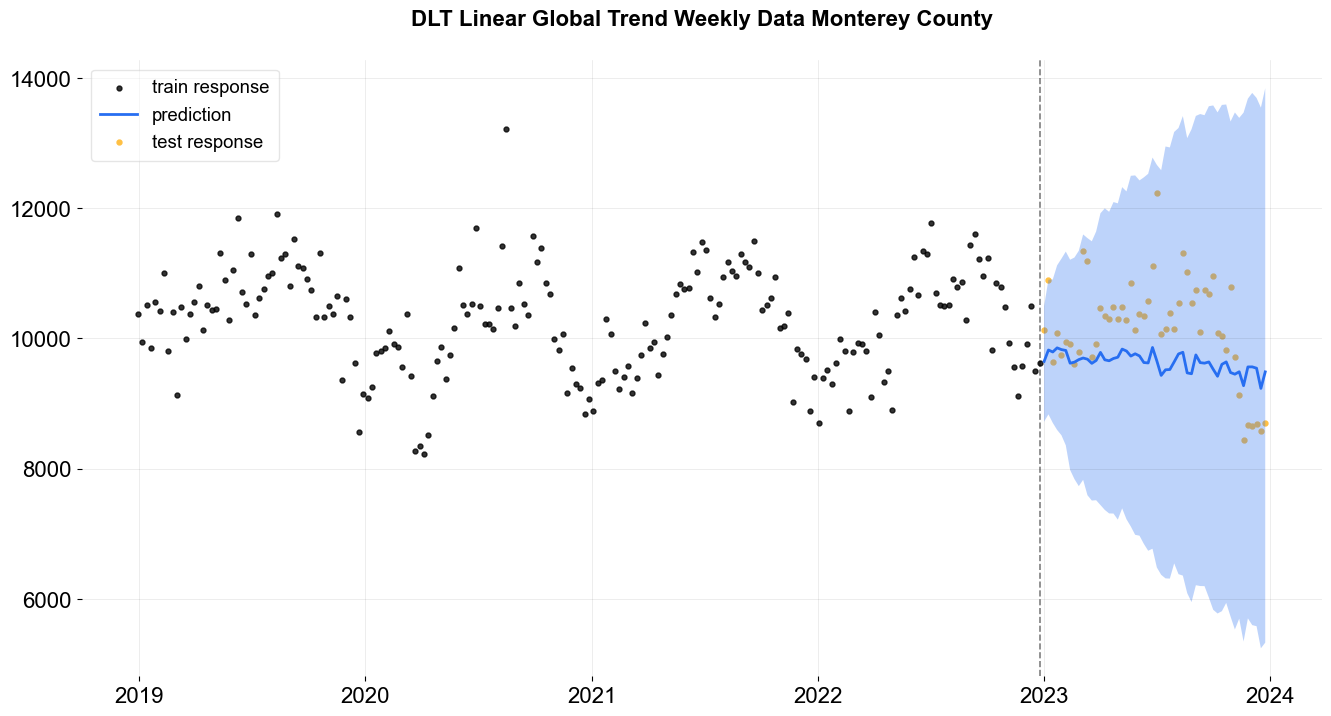

CPU times: total: 1.41 s
Wall time: 7.02 s


In [40]:
%%time

mcow_dlt = DLT(
    response_col = 'mco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=52,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

mcow_dlt.fit(df=tr_mcow)

predicted_mcow_dlt = mcow_dlt.predict(tst_mcow)

_ = plot_predicted_data(tr_mcow, predicted_mcow_dlt, 'ds', 'mco', test_actual_df = tst_mcow, title='DLT Linear Global Trend Weekly Data Monterey County')

In [41]:
predicted_mcow_dlt.tail()

,ds,prediction_5,prediction,prediction_95
47,2023-11-26,5702.892746,9563.148152,13682.010448
48,2023-12-03,5599.169879,9564.102818,13769.844298
49,2023-12-10,5582.399968,9543.489755,13692.968300
50,2023-12-17,5243.497648,9233.631459,13544.416533
51,2023-12-24,5329.779263,9487.211453,13841.267171


2024-08-01 10:40:34 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


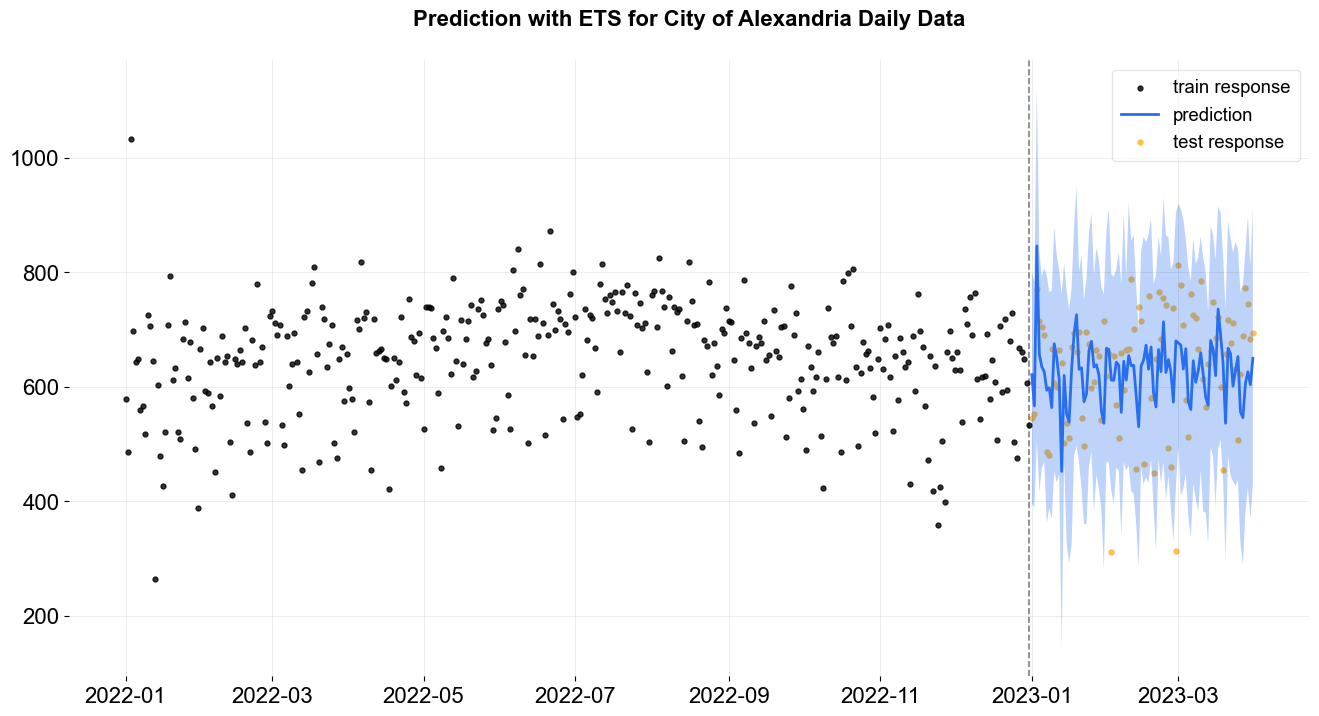

CPU times: total: 1.08 s
Wall time: 3.73 s


In [43]:
%%time
alxd_ets = ETS(
    response_col = 'alx',
    date_col = 'ds',
    seasonality=365,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

alxd_ets.fit(df=tr_alxd)

predicted_alxd_ets = alxd_ets.predict(df=tst_alxd)

_ = plot_predicted_data(tr_alxd, predicted_alxd_ets, 'ds', 'alx', test_actual_df = tst_alxd, title='Prediction with ETS for City of Alexandria Daily Data')

In [44]:
predicted_alxd_ets.tail()

,ds,prediction_5,prediction,prediction_95
85,2023-03-27,289.547896,546.201772,778.551070
86,2023-03-28,380.836650,605.951981,836.945501
87,2023-03-29,423.845984,626.163294,897.480105
88,2023-03-30,369.832775,603.549182,810.678891
89,2023-03-31,429.167801,649.745818,909.965143


2024-08-01 10:43:43 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


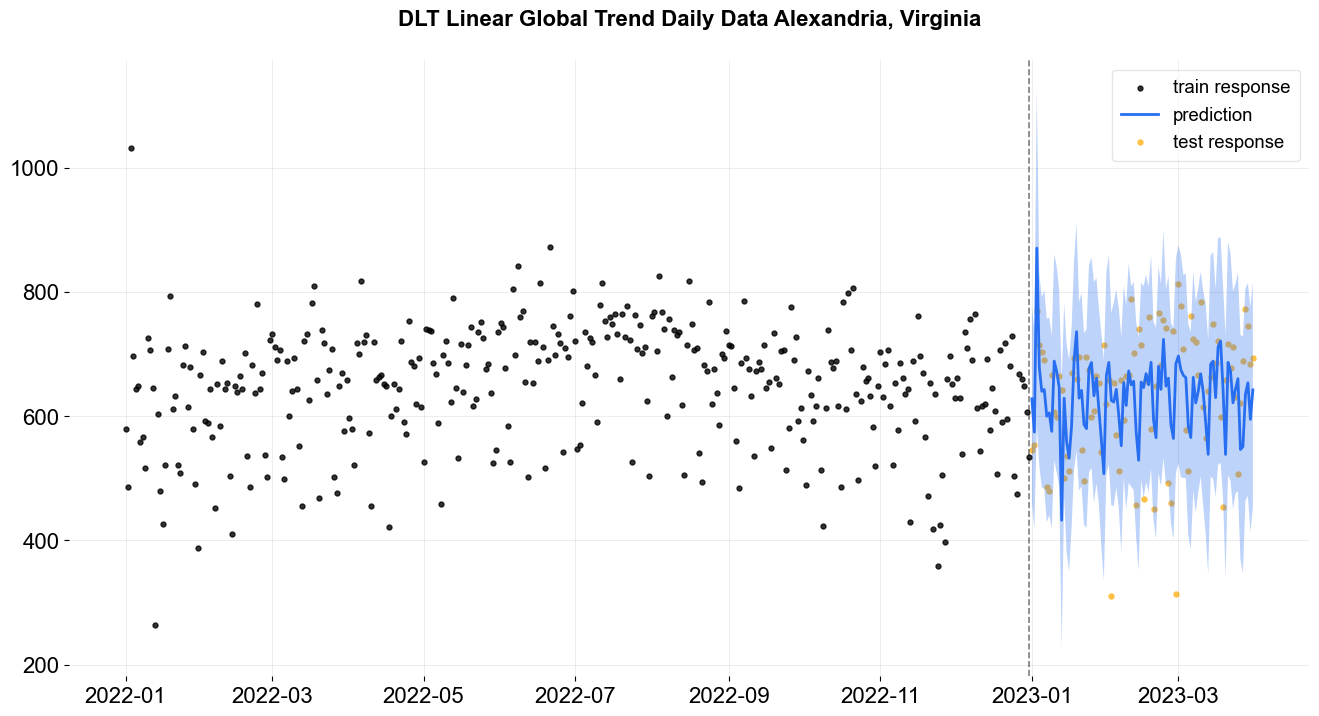

CPU times: total: 1.19 s
Wall time: 12.9 s


In [45]:
%%time

alxd_dlt = DLT(
    response_col = 'alx',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=365,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

alxd_dlt.fit(df=tr_alxd)

predicted_alxd_dlt = alxd_dlt.predict(tst_alxd)

_ = plot_predicted_data(tr_alxd, predicted_alxd_dlt, 'ds', 'alx', test_actual_df = tst_alxd, title='DLT Linear Global Trend Daily Data Alexandria, Virginia')

In [46]:
predicted_alxd_dlt.tail()

,ds,prediction_5,prediction,prediction_95
85,2023-03-27,346.830147,550.785490,727.977922
86,2023-03-28,464.256986,634.981369,805.533858
87,2023-03-29,471.666832,653.722193,814.039916
88,2023-03-30,412.684006,594.849514,775.492928
89,2023-03-31,451.169348,642.395888,815.752145


2024-08-01 10:52:24 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


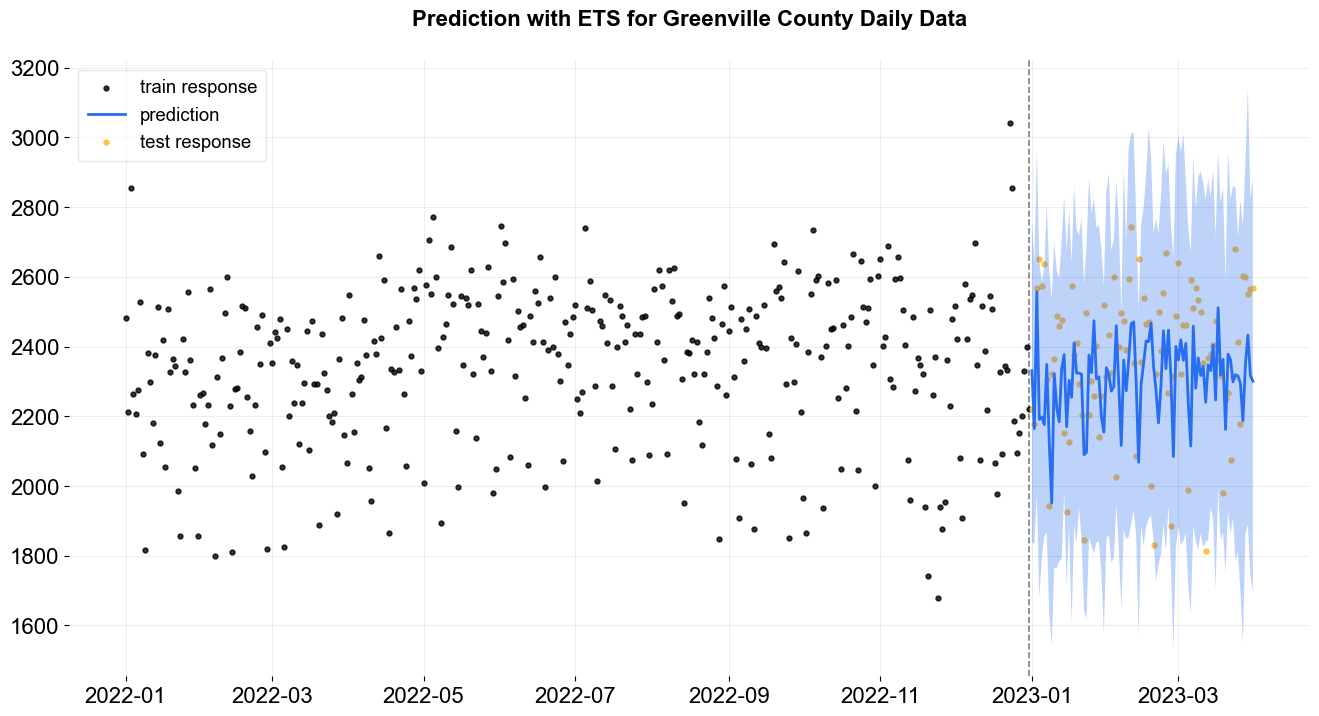

CPU times: total: 1.19 s
Wall time: 3.03 s


In [50]:
%%time
gcod_ets = ETS(
    response_col = 'gco',
    date_col = 'ds',
    seasonality=365,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

gcod_ets.fit(df=tr_gcod)

predicted_gcod_ets = gcod_ets.predict(df=tst_gcod)

_ = plot_predicted_data(tr_gcod, predicted_gcod_ets, 'ds', 'gco', test_actual_df = tst_gcod, title='Prediction with ETS for Greenville County Daily Data')

In [51]:
predicted_gcod_ets.tail()

,ds,prediction_5,prediction,prediction_95
85,2023-03-27,1549.513691,2187.216383,2745.679718
86,2023-03-28,1863.431276,2348.379201,2923.500471
87,2023-03-29,1888.353414,2432.791713,3140.899411
88,2023-03-30,1741.834626,2317.422840,2825.722601
89,2023-03-31,1700.023751,2300.612515,2879.776469


2024-08-01 10:57:28 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


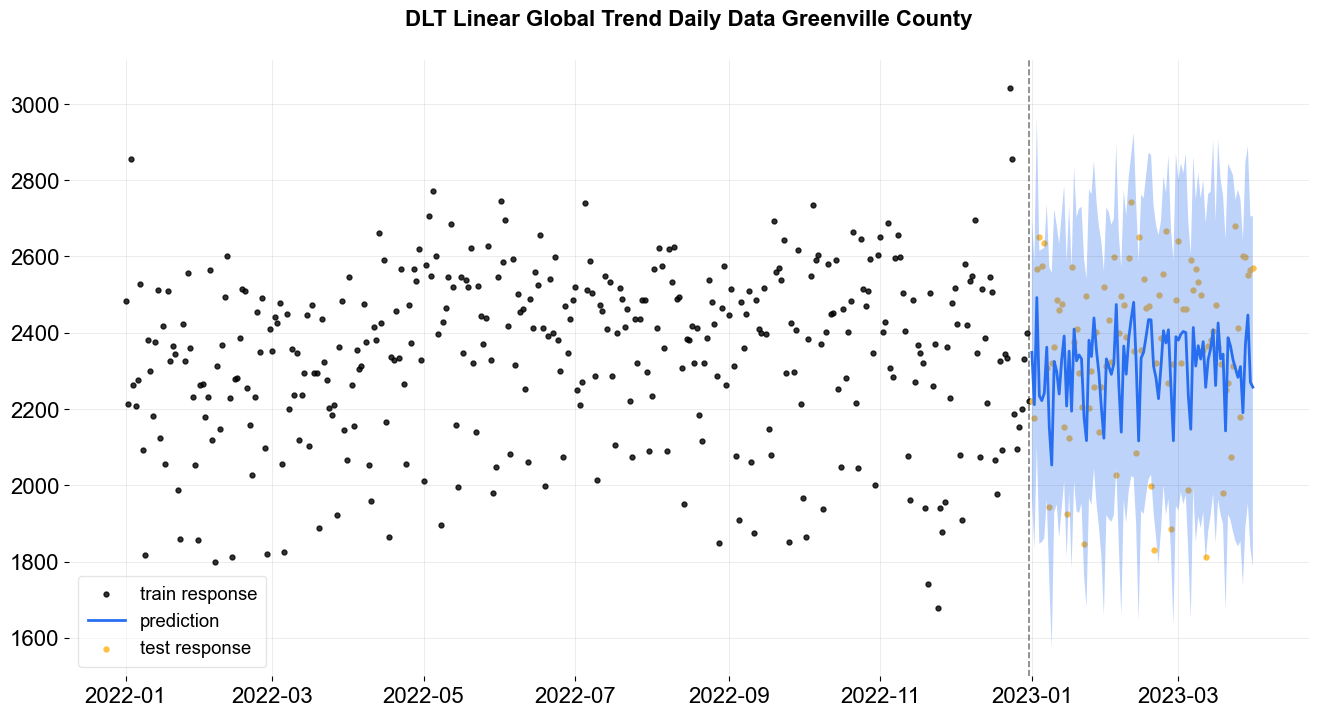

CPU times: total: 1.5 s
Wall time: 13.2 s


In [52]:
%%time

gcod_dlt = DLT(
    response_col = 'gco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=365,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

gcod_dlt.fit(df=tr_gcod)

predicted_gcod_dlt = gcod_dlt.predict(tst_gcod)

_ = plot_predicted_data(tr_gcod, predicted_gcod_dlt, 'ds', 'gco', test_actual_df = tst_gcod, title='DLT Linear Global Trend Daily Data Greenville County')

In [53]:
predicted_gcod_dlt.tail()

,ds,prediction_5,prediction,prediction_95
85,2023-03-27,1739.153912,2190.359241,2643.184537
86,2023-03-28,1891.085255,2369.265213,2846.436012
87,2023-03-29,1952.750621,2446.460426,2889.145087
88,2023-03-30,1834.906846,2270.456862,2704.546099
89,2023-03-31,1786.307810,2257.390892,2706.682501


2024-08-01 11:17:32 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


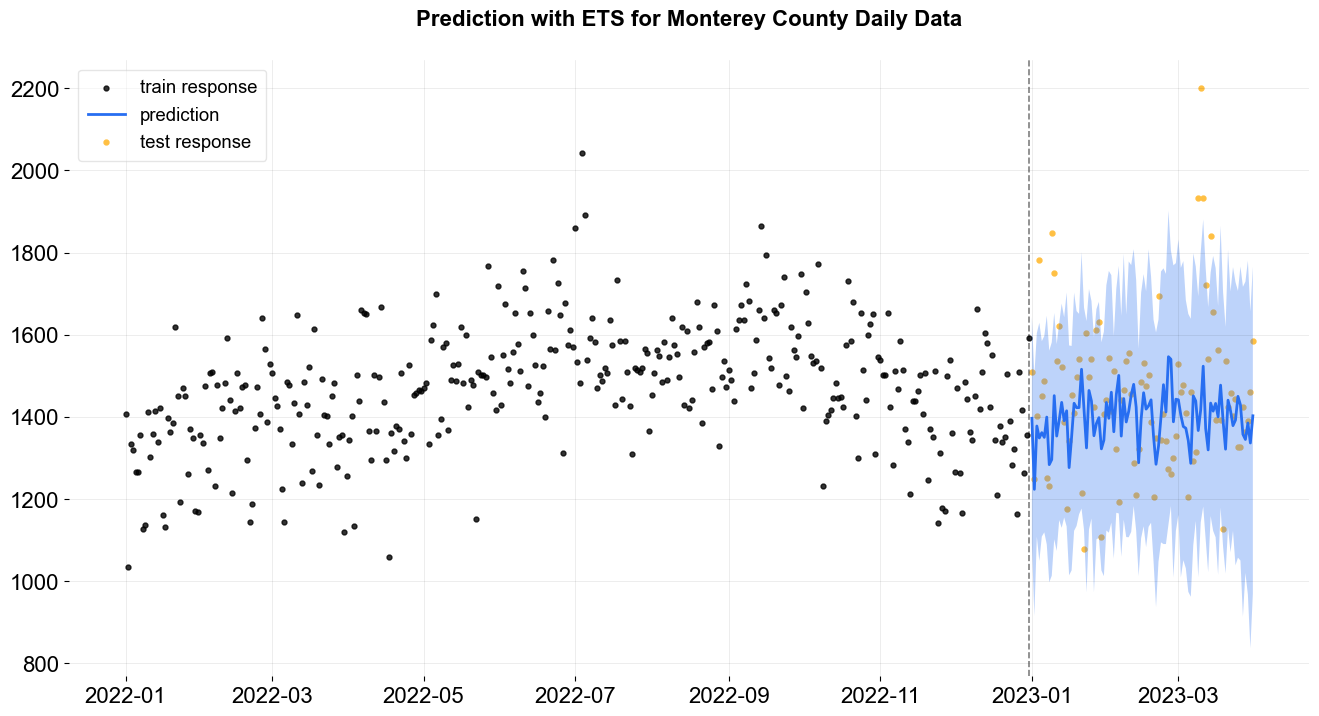

CPU times: total: 1.12 s
Wall time: 3.49 s


In [54]:
%%time
mcod_ets = ETS(
    response_col = 'mco',
    date_col = 'ds',
    seasonality=365,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

mcod_ets.fit(df=tr_mcod)

predicted_mcod_ets = mcod_ets.predict(df=tst_mcod)

_ = plot_predicted_data(tr_mcod, predicted_mcod_ets, 'ds', 'mco', test_actual_df = tst_mcod, title='Prediction with ETS for Monterey County Daily Data')

In [56]:
predicted_mcod_ets.tail()

,ds,prediction_5,prediction,prediction_95
85,2023-03-27,913.761080,1357.600468,1716.748451
86,2023-03-28,1020.027922,1345.113940,1729.059939
87,2023-03-29,967.368288,1385.112167,1780.297440
88,2023-03-30,836.743758,1336.489034,1656.974422
89,2023-03-31,970.264787,1402.709724,1765.553199


2024-08-01 11:21:46 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


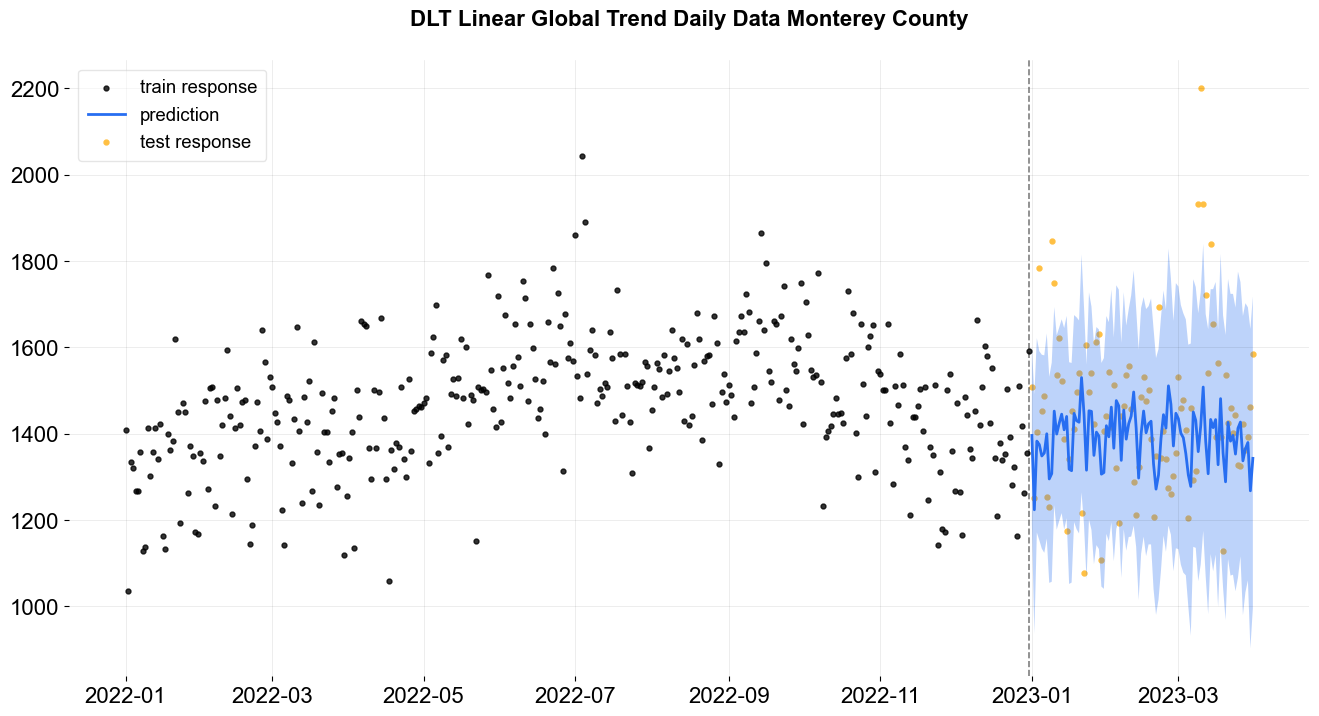

CPU times: total: 1.81 s
Wall time: 14.9 s


In [57]:
%%time

mcod_dlt = DLT(
    response_col = 'mco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=365,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

mcod_dlt.fit(df=tr_mcod)

predicted_mcod_dlt = mcod_dlt.predict(tst_mcod)

_ = plot_predicted_data(tr_mcod, predicted_mcod_dlt, 'ds', 'mco', test_actual_df = tst_mcod, title='DLT Linear Global Trend Daily Data Monterey County')

In [58]:
predicted_mcod_dlt.tail()

,ds,prediction_5,prediction,prediction_95
85,2023-03-27,979.177351,1336.918461,1672.509278
86,2023-03-28,1032.282620,1364.856821,1702.186904
87,2023-03-29,1060.127784,1379.430340,1692.551337
88,2023-03-30,902.654604,1267.505746,1642.486950
89,2023-03-31,995.558961,1342.650289,1717.447013


2024-08-01 11:24:46 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


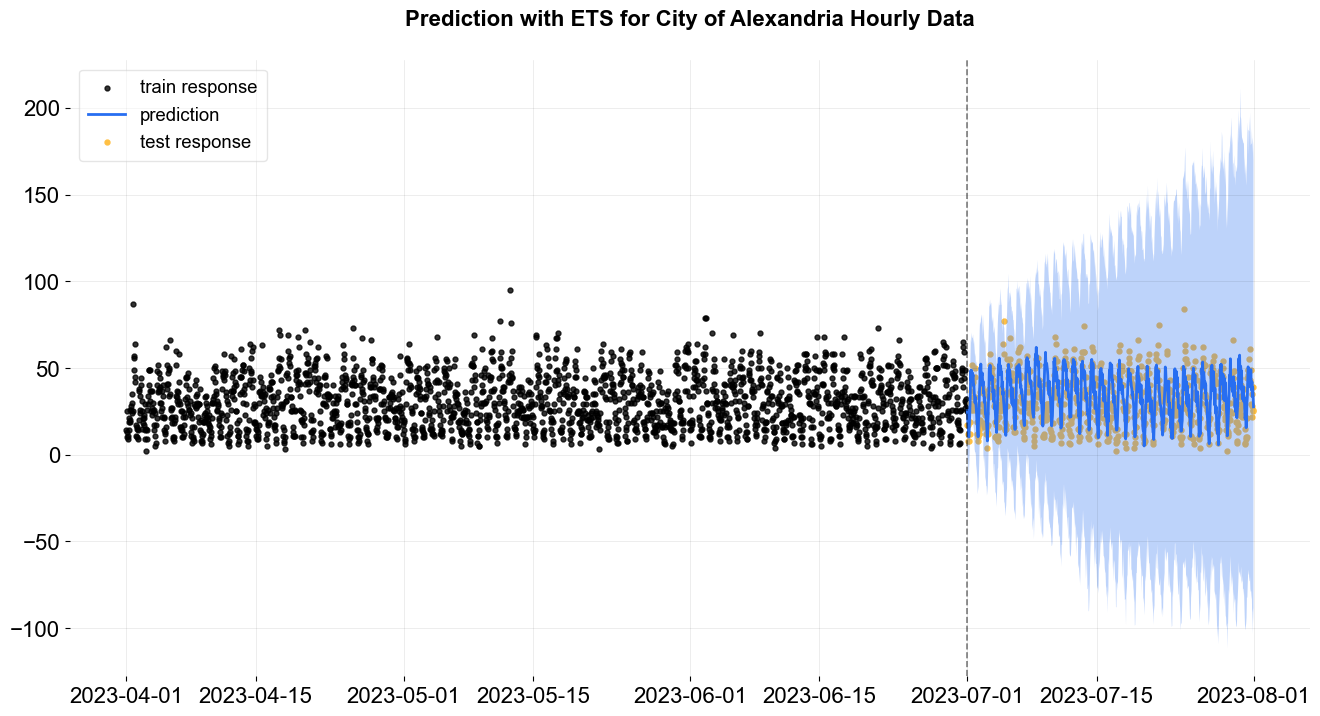

CPU times: total: 2.17 s
Wall time: 19.9 s


In [59]:
%%time
alxh_ets = ETS(
    response_col = 'alx',
    date_col = 'ds',
    seasonality=24,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

alxh_ets.fit(df=tr_alxh)

predicted_alxh_ets = alxh_ets.predict(df=tst_alxh)

_ = plot_predicted_data(tr_alxh, predicted_alxh_ets, 'ds', 'alx', test_actual_df = tst_alxh, title='Prediction with ETS for City of Alexandria Hourly Data')

In [60]:
predicted_alxh_ets.tail()

,ds,prediction_5,prediction,prediction_95
739,2023-07-31 19:00:00,-83.622204,42.060772,187.923292
740,2023-07-31 20:00:00,-103.268067,33.467526,173.526975
741,2023-07-31 21:00:00,-90.856831,38.703037,183.003831
742,2023-07-31 22:00:00,-88.508586,34.407186,179.459503
743,2023-07-31 23:00:00,-96.989243,27.602609,169.772613


2024-08-01 11:27:24 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


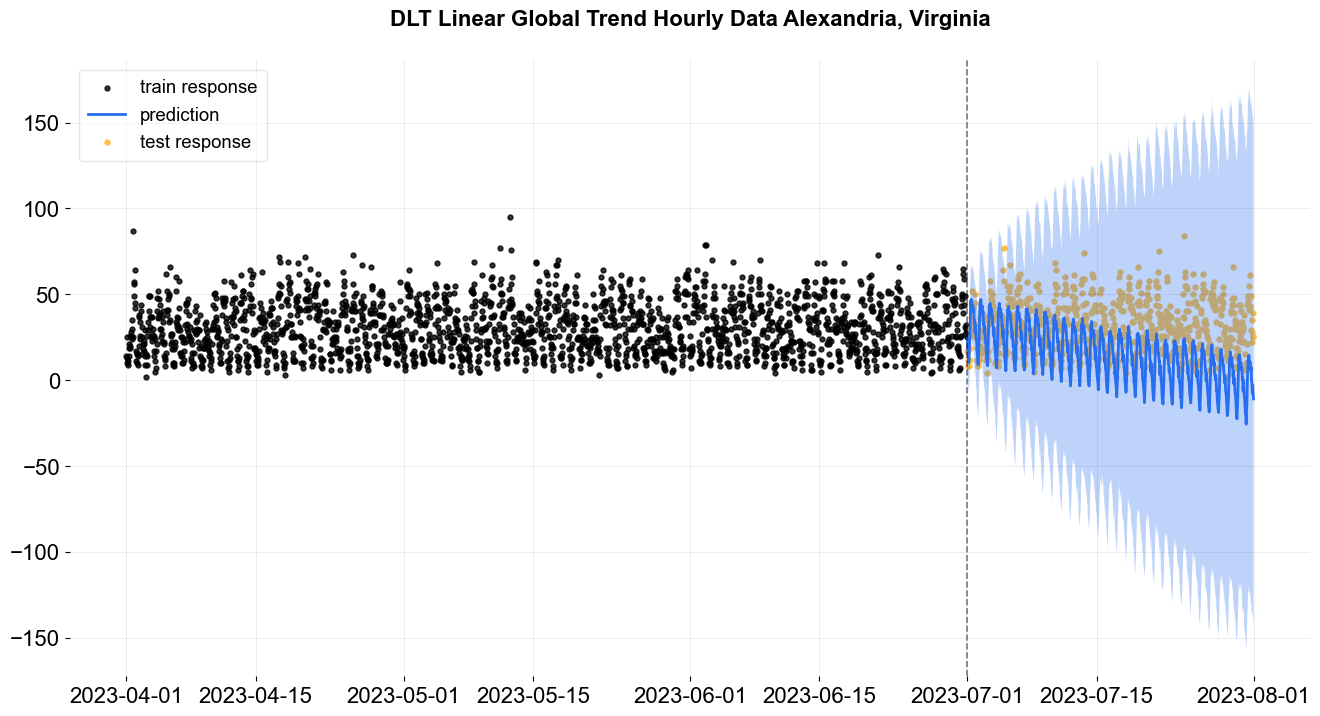

CPU times: total: 3.67 s
Wall time: 1min 12s


In [61]:
%%time

alxh_dlt = DLT(
    response_col = 'alx',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=24,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

alxh_dlt.fit(df=tr_alxh)

predicted_alxh_dlt = alxh_dlt.predict(tst_alxh)

_ = plot_predicted_data(tr_alxh, predicted_alxh_dlt, 'ds', 'alx', test_actual_df = tst_alxh, title='DLT Linear Global Trend Hourly Data Alexandria, Virginia')

In [62]:
predicted_alxh_dlt.tail()

,ds,prediction_5,prediction,prediction_95
739,2023-07-31 19:00:00,-133.713721,-1.753395,163.850715
740,2023-07-31 20:00:00,-139.188448,-7.773741,153.533201
741,2023-07-31 21:00:00,-133.705909,-3.068694,154.250823
742,2023-07-31 22:00:00,-140.686465,-7.455707,153.437863
743,2023-07-31 23:00:00,-141.696489,-10.908124,145.583531


**Please note that this will need to be discussed**

2024-08-01 11:31:29 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


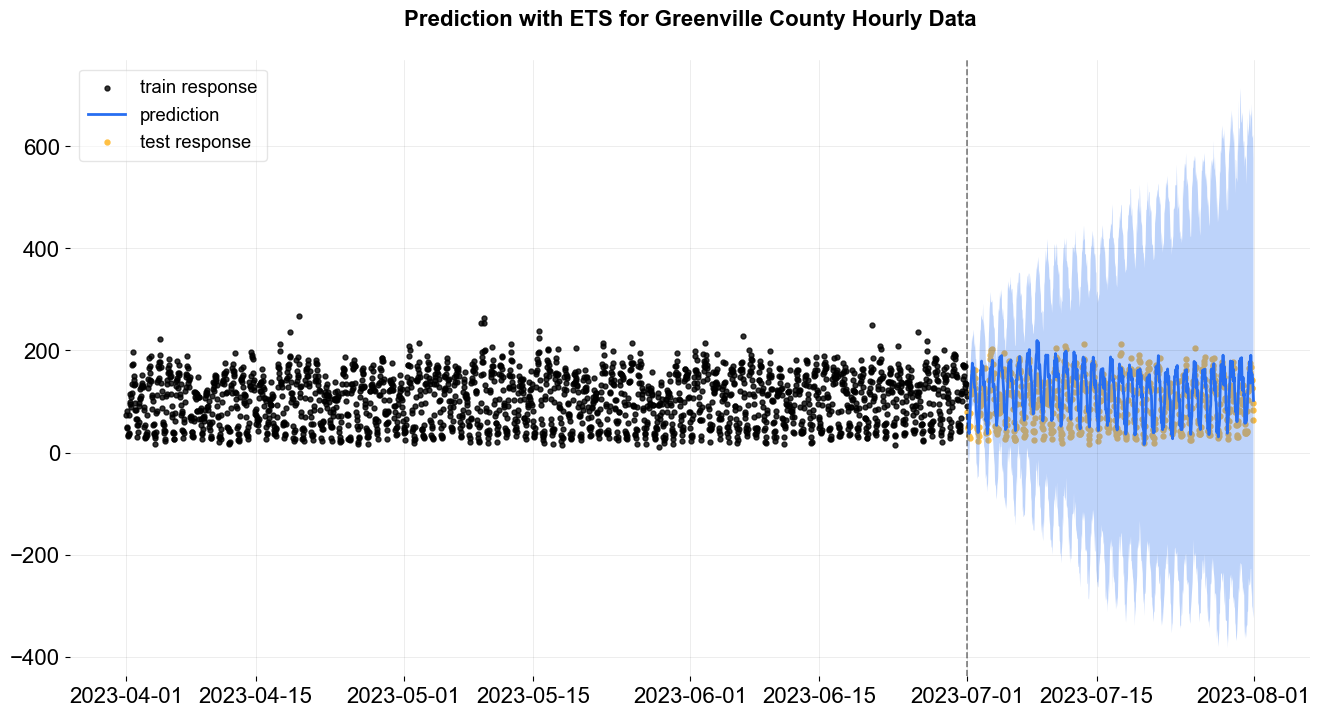

CPU times: total: 2.05 s
Wall time: 28.6 s


In [63]:
%%time
gcoh_ets = ETS(
    response_col = 'gco',
    date_col = 'ds',
    seasonality=24,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

gcoh_ets.fit(df=tr_gcoh)

predicted_gcoh_ets = gcoh_ets.predict(df=tst_gcoh)

_ = plot_predicted_data(tr_gcoh, predicted_gcoh_ets, 'ds', 'gco', test_actual_df = tst_gcoh, title='Prediction with ETS for Greenville County Hourly Data')

In [64]:
predicted_gcoh_ets.tail()

,ds,prediction_5,prediction,prediction_95
739,2023-07-31 19:00:00,-261.086837,154.208539,682.002628
740,2023-07-31 20:00:00,-300.074781,147.740759,620.661906
741,2023-07-31 21:00:00,-304.915568,141.387171,615.390051
742,2023-07-31 22:00:00,-314.934721,121.171496,622.390271
743,2023-07-31 23:00:00,-324.147589,102.059344,575.009477


2024-08-01 11:38:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


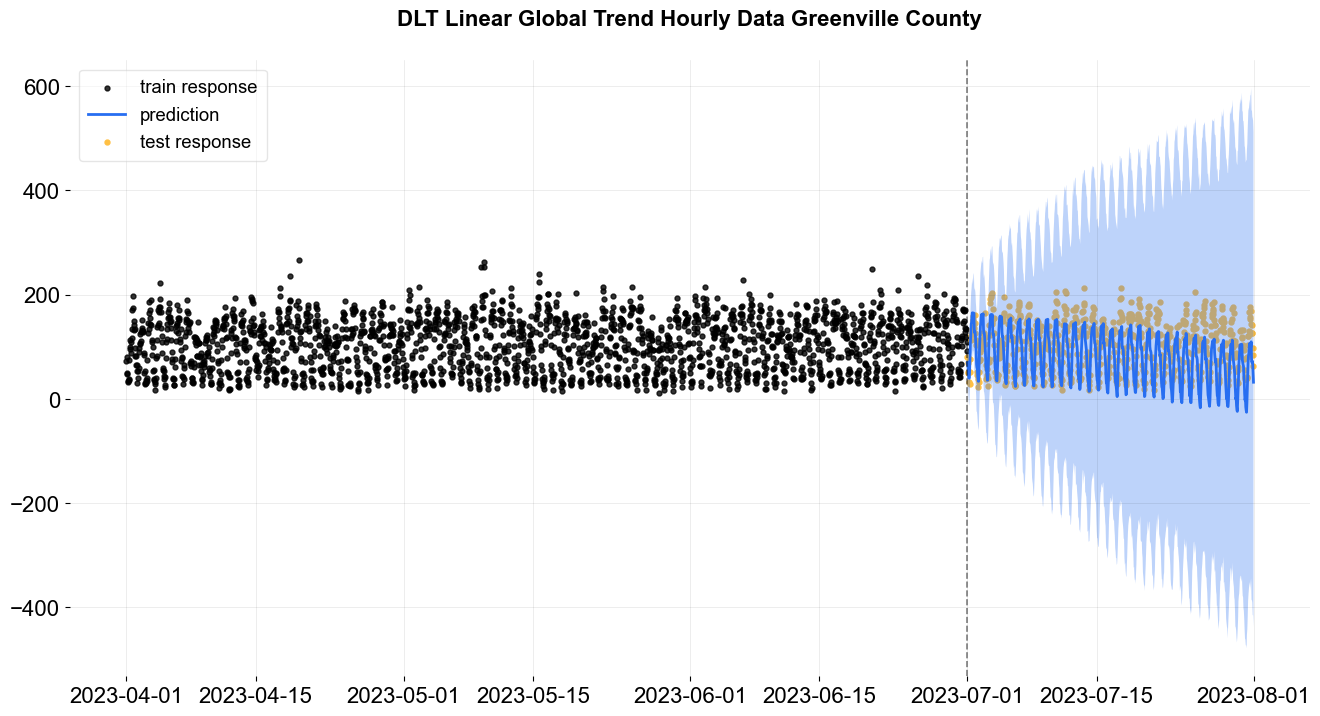

CPU times: total: 3.91 s
Wall time: 1min 44s


In [67]:
%%time

gcoh_dlt = DLT(
    response_col = 'gco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=24,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

gcoh_dlt.fit(df=tr_gcoh)

predicted_gcoh_dlt = gcoh_dlt.predict(tst_gcoh)

_ = plot_predicted_data(tr_gcoh, predicted_gcoh_dlt, 'ds', 'gco', test_actual_df = tst_gcoh, title='DLT Linear Global Trend Hourly Data Greenville County')

In [68]:
predicted_gcoh_dlt.tail()

,ds,prediction_5,prediction,prediction_95
739,2023-07-31 19:00:00,-385.212220,70.075132,553.641693
740,2023-07-31 20:00:00,-390.789441,72.623811,541.327587
741,2023-07-31 21:00:00,-414.355396,66.111808,538.338973
742,2023-07-31 22:00:00,-415.331081,48.863311,533.738788
743,2023-07-31 23:00:00,-436.799756,32.091134,512.236555


*It's obvious that **Damped Local Trend** is not appropriate for hourly data*

2024-08-01 11:47:56 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


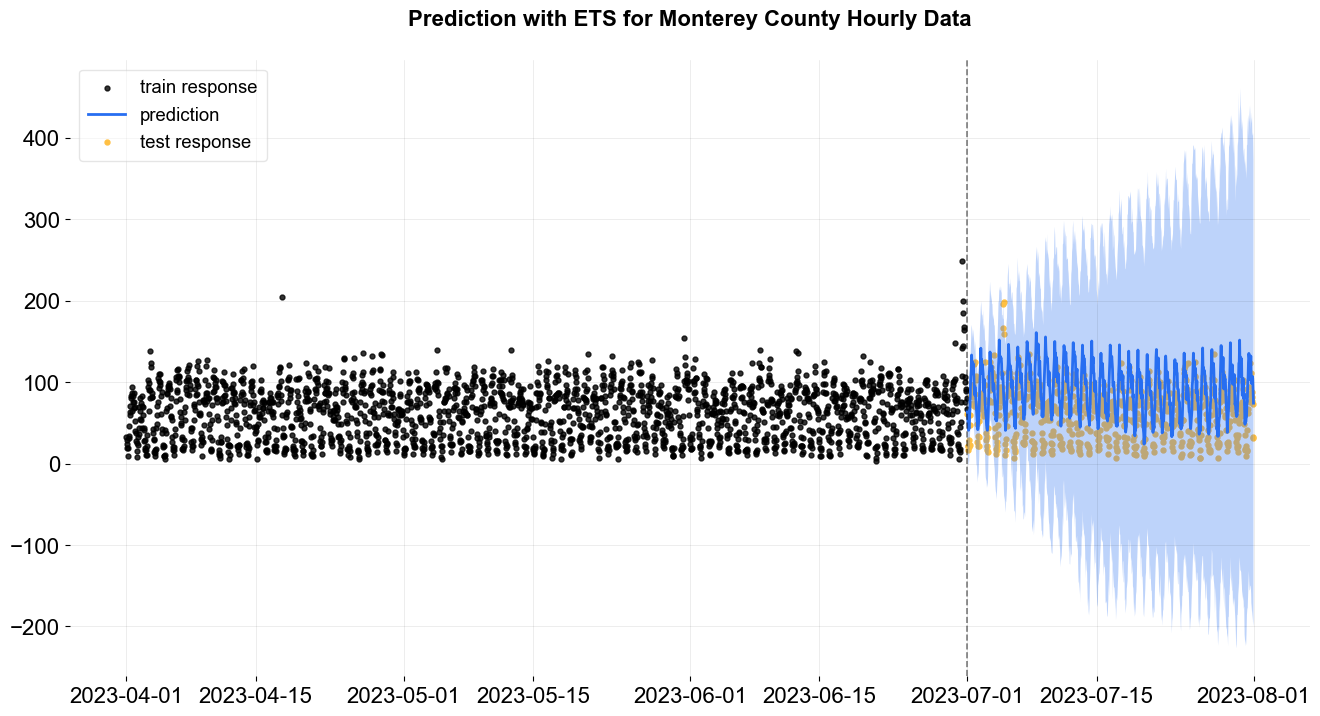

CPU times: total: 1.66 s
Wall time: 28.3 s


In [69]:
%%time
mcoh_ets = ETS(
    response_col = 'mco',
    date_col = 'ds',
    seasonality=24,
    seed=42,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)

mcoh_ets.fit(df=tr_mcoh)

predicted_mcoh_ets = mcoh_ets.predict(df=tst_mcoh)

_ = plot_predicted_data(tr_mcoh, predicted_mcoh_ets, 'ds', 'mco', test_actual_df = tst_mcoh, title='Prediction with ETS for Monterey County Hourly Data')

In [70]:
predicted_mcoh_ets.tail()

,ds,prediction_5,prediction,prediction_95
739,2023-07-31 19:00:00,-171.540338,101.924924,431.158729
740,2023-07-31 20:00:00,-192.520801,107.031969,407.088052
741,2023-07-31 21:00:00,-180.605313,104.595994,402.476291
742,2023-07-31 22:00:00,-199.785382,87.175328,405.283293
743,2023-07-31 23:00:00,-192.135563,74.125950,372.950744


2024-08-01 11:54:55 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


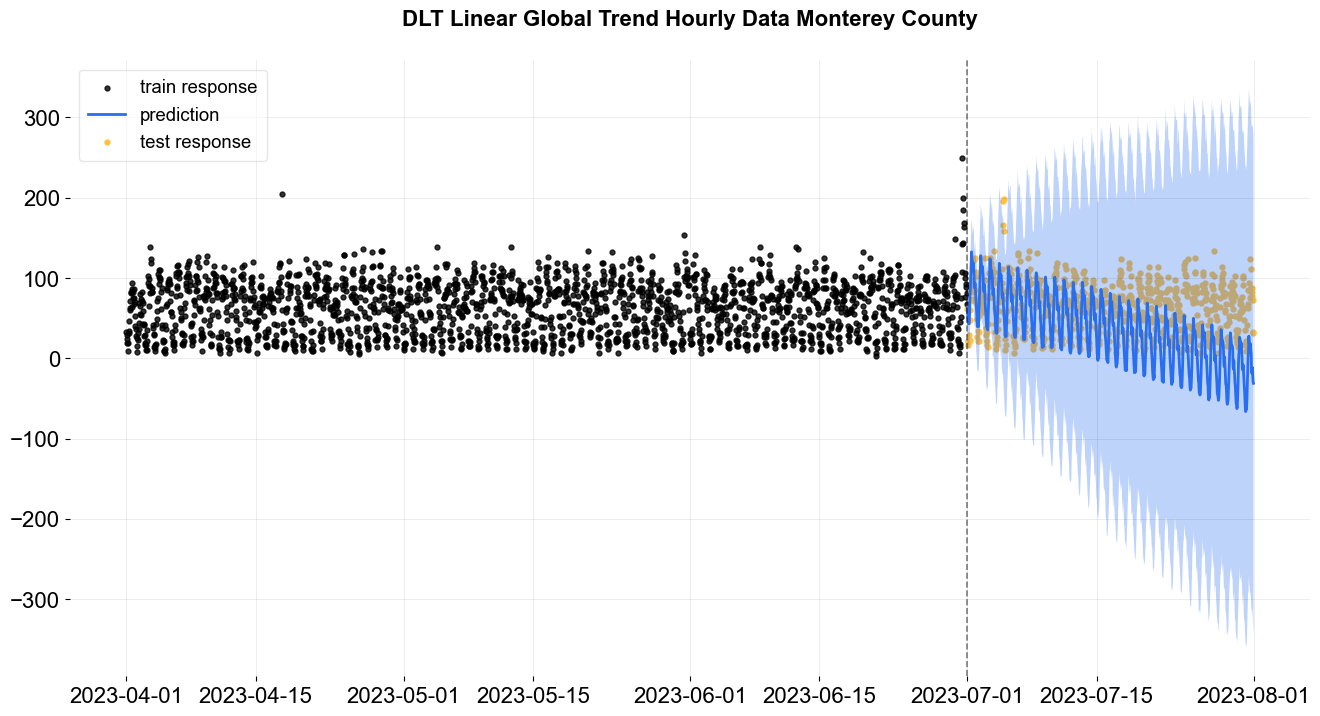

CPU times: total: 4.44 s
Wall time: 1min 33s


In [71]:
%%time

mcoh_dlt = DLT(
    response_col = 'mco',
    date_col = 'ds',
    estimator='stan-mcmc',
    seasonality=24,
    seed=42,
    global_trend_option='linear',
    n_bootstrap_draws=1000,
    stan_mcmc_args={'show_progress': False},
)

mcoh_dlt.fit(df=tr_mcoh)

predicted_mcoh_dlt = mcoh_dlt.predict(tst_mcoh)

_ = plot_predicted_data(tr_mcoh, predicted_mcoh_dlt, 'ds', 'mco', test_actual_df = tst_mcoh, title='DLT Linear Global Trend Hourly Data Monterey County')

In [72]:
predicted_mcoh_dlt.tail()

,ds,prediction_5,prediction,prediction_95
739,2023-07-31 19:00:00,-311.044572,-18.806883,288.091334
740,2023-07-31 20:00:00,-313.883292,-11.342172,289.793691
741,2023-07-31 21:00:00,-322.311187,-21.520927,289.796285
742,2023-07-31 22:00:00,-333.702259,-29.747664,285.391498
743,2023-07-31 23:00:00,-345.544667,-31.306046,271.845868


In [73]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "SMAPE", "MASE", "RMSE", "R2"]

In [76]:
print(tst_alxm.__class__)
print(predicted_alxm_ets.__class__)

print(tst_alxm['alx'].__class__)
print(predicted_alxm_ets['prediction'].__class__)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [80]:
alxm_true = tst_alxm['alx'].tolist()
alxm_ets_pred = predicted_alxm_ets['prediction'].tolist()

alxm_ets_eval = RegressionMetric(alxm_true, alxm_ets_pred)

alxm_ets_reslist = []

for metric in list_metrics:
    alxm_ets_reslist.append(alxm_ets_eval.get_metric_by_name(metric))

print(alxm_ets_reslist)

[{'MSE': 4675101.975727899}, {'MAE': 1862.9872417730041}, {'MedAE': 2117.076053970335}, {'MAPE': 0.0858086807731404}, {'SMAPE': 0.045233838811651134}, {'MASE': 1.3967325285920833}, {'RMSE': 2162.1984126642724}, {'R2': -0.30042816862079746}]


In [81]:
alxm_true = tst_alxm['alx'].tolist()
alxm_dlt_pred = predicted_alxm_dlt['prediction'].tolist()

alxm_dlt_eval = RegressionMetric(alxm_true, alxm_dlt_pred)

alxm_dlt_reslist = []

for metric in list_metrics:
    alxm_dlt_reslist.append(alxm_dlt_eval.get_metric_by_name(metric))

print(alxm_dlt_reslist)

[{'MSE': 2935313.913499756}, {'MAE': 1598.2144730134662}, {'MedAE': 1499.7331551955976}, {'MAPE': 0.0754376405070709}, {'SMAPE': 0.03873394570311343}, {'MASE': 1.1982251365286347}, {'RMSE': 1713.2757844257753}, {'R2': 0.18351194975478313}]


In [82]:
gcom_true = tst_gcom['gco'].tolist()
gcom_ets_pred = predicted_gcom_ets['prediction'].tolist()
gcom_dlt_pred = predicted_gcom_dlt['prediction'].tolist()

gcom_ets_eval = RegressionMetric(gcom_true, gcom_ets_pred)
gcom_dlt_eval = RegressionMetric(gcom_true, gcom_dlt_pred)

gcom_ets_reslist=[]
gcom_dlt_reslist=[]

for metric in list_metrics:
    gcom_ets_reslist.append(gcom_ets_eval.get_metric_by_name(metric))
    gcom_dlt_reslist.append(gcom_dlt_eval.get_metric_by_name(metric))

print(gcom_ets_reslist)
print(gcom_dlt_reslist)

[{'MSE': 2553291.2517650384}, {'MAE': 1216.4657487827583}, {'MedAE': 832.6471425408236}, {'MAPE': 0.01706532517812966}, {'SMAPE': 0.008503114256745194}, {'MASE': 0.36143707083924}, {'RMSE': 1597.902140860021}, {'R2': 0.7780788227349582}]
[{'MSE': 3453567.2374262735}, {'MAE': 1456.8479378809097}, {'MedAE': 911.9019604792265}, {'MAPE': 0.020470282637146016}, {'SMAPE': 0.010064205230767433}, {'MASE': 0.43285957853951723}, {'RMSE': 1858.3775820393103}, {'R2': 0.6998306767534622}]


In [83]:
mcom_true = tst_mcom['mco'].tolist()
mcom_ets_pred = predicted_mcom_ets['prediction'].tolist()
mcom_dlt_pred = predicted_mcom_dlt['prediction'].tolist()

mcom_ets_eval = RegressionMetric(mcom_true, mcom_ets_pred)
mcom_dlt_eval = RegressionMetric(mcom_true, mcom_dlt_pred)

mcom_ets_reslist=[]
mcom_dlt_reslist=[]

for metric in list_metrics:
    mcom_ets_reslist.append(mcom_ets_eval.get_metric_by_name(metric))
    mcom_dlt_reslist.append(mcom_dlt_eval.get_metric_by_name(metric))

print(mcom_ets_reslist)
print(mcom_dlt_reslist)

[{'MSE': 7578429.82558307}, {'MAE': 2132.4905422441675}, {'MedAE': 1505.7505990324062}, {'MAPE': 0.04738056662850742}, {'SMAPE': 0.024461376511949805}, {'MASE': 0.8606323732273936}, {'RMSE': 2752.894808303265}, {'R2': -0.40635049590203964}]
[{'MSE': 7435297.712531903}, {'MAE': 2094.7276643377154}, {'MedAE': 1726.3353853718363}, {'MAPE': 0.04630176870893168}, {'SMAPE': 0.023816053282542046}, {'MASE': 0.8453919983752153}, {'RMSE': 2726.774232042672}, {'R2': -0.37978906790154654}]


In [84]:
alxw_true = tst_alxw['alx'].tolist()
alxw_ets_pred = predicted_alxw_ets['prediction'].tolist()
alxw_dlt_pred = predicted_alxw_dlt['prediction'].tolist()

alxw_ets_eval = RegressionMetric(alxw_true, alxw_ets_pred)
alxw_dlt_eval = RegressionMetric(alxw_true, alxw_dlt_pred)

alxw_ets_reslist=[]
alxw_dlt_reslist=[]

for metric in list_metrics:
    alxw_ets_reslist.append(alxw_ets_eval.get_metric_by_name(metric))
    alxw_dlt_reslist.append(alxw_dlt_eval.get_metric_by_name(metric))

print(alxw_ets_reslist)
print(alxw_dlt_reslist)

[{'MSE': 441850.28506315243}, {'MAE': 555.8689897029952}, {'MedAE': 577.3318185742701}, {'MAPE': 0.11077045320609374}, {'SMAPE': 0.059709287329413274}, {'MASE': 2.393155366778048}, {'RMSE': 664.7181997381691}, {'R2': -1.3844122399428254}]
[{'MSE': 511353.7205802273}, {'MAE': 611.0301270707052}, {'MedAE': 634.8687247450061}, {'MAPE': 0.1220241748967197}, {'SMAPE': 0.0661192256474975}, {'MASE': 2.6306378930108028}, {'RMSE': 715.0900087263332}, {'R2': -1.7594823665611745}]


In [85]:
gcow_true = tst_gcow['gco'].tolist()
gcow_ets_pred = predicted_gcow_ets['prediction'].tolist()
gcow_dlt_pred = predicted_gcow_dlt['prediction'].tolist()

gcow_ets_eval = RegressionMetric(gcow_true, gcow_ets_pred)
gcow_dlt_eval = RegressionMetric(gcow_true, gcow_dlt_pred)

gcow_ets_reslist = []
gcow_dlt_reslist = []

for metric in list_metrics:
    gcow_ets_reslist.append(gcow_ets_eval.get_metric_by_name(metric))
    gcow_dlt_reslist.append(gcow_dlt_eval.get_metric_by_name(metric))

print(gcow_ets_reslist)
print(gcow_dlt_reslist)

[{'MSE': 733491.9467529947}, {'MAE': 676.5087309403077}, {'MedAE': 570.5569011845546}, {'MAPE': 0.039939201169865816}, {'SMAPE': 0.020333139393578805}, {'MASE': 1.3191842654261563}, {'RMSE': 856.4414438553255}, {'R2': -0.22667628001962292}]
[{'MSE': 739662.3914425665}, {'MAE': 683.7038240025678}, {'MedAE': 549.9909341318335}, {'MAPE': 0.04034235426839334}, {'SMAPE': 0.02054052656769146}, {'MASE': 1.333214614366099}, {'RMSE': 860.0362733295419}, {'R2': -0.23699560004948528}]


In [86]:
mcow_true = tst_mcow['mco'].tolist()
mcow_ets_pred = predicted_mcow_ets['prediction'].tolist()
mcow_dlt_pred = predicted_mcow_dlt['prediction'].tolist()

mcow_ets_eval = RegressionMetric(mcow_true, mcow_ets_pred)
mcow_dlt_eval = RegressionMetric(mcow_true, mcow_dlt_pred)

mcow_ets_reslist=[]
mcow_dlt_reslist=[]

for metric in list_metrics:
    mcow_ets_reslist.append(mcow_ets_eval.get_metric_by_name(metric))
    mcow_dlt_reslist.append(mcow_dlt_eval.get_metric_by_name(metric))

print(mcow_ets_reslist)
print(mcow_dlt_reslist)

[{'MSE': 679070.2557648869}, {'MAE': 680.6174131625479}, {'MedAE': 600.0673917435324}, {'MAPE': 0.0659134115745553}, {'SMAPE': 0.033878075944705405}, {'MASE': 1.4946386527424191}, {'RMSE': 824.0571920473037}, {'R2': -0.15485270837353382}]
[{'MSE': 800432.8239729542}, {'MAE': 750.11423402904}, {'MedAE': 671.081078234839}, {'MAPE': 0.07217253184577274}, {'SMAPE': 0.03740456638291734}, {'MASE': 1.6472539586411057}, {'RMSE': 894.6691142388644}, {'R2': -0.3612465084264993}]


In [88]:
alxd_true = tst_alxd['alx'].tolist()
alxd_ets_pred = predicted_alxd_ets['prediction'].tolist()
alxd_dlt_pred = predicted_alxd_dlt['prediction'].tolist()

alxd_ets_eval = RegressionMetric(alxd_true, alxd_ets_pred)
alxd_dlt_eval = RegressionMetric(alxd_true, alxd_dlt_pred)

alxd_ets_reslist=[]
alxd_dlt_reslist=[]

for metric in list_metrics:
    alxd_ets_reslist.append(alxd_ets_eval.get_metric_by_name(metric))
    alxd_dlt_reslist.append(alxd_dlt_eval.get_metric_by_name(metric))

print(alxd_ets_reslist)
print(alxd_dlt_reslist)

[{'MSE': 11765.474141870196}, {'MAE': 88.06134999322703}, {'MedAE': 77.30104689800885}, {'MAPE': 0.15334216669872514}, {'SMAPE': 0.072472837353833}, {'MASE': 0.8308555230994599}, {'RMSE': 108.46877035290018}, {'R2': -0.10041493518860478}]
[{'MSE': 11658.513588348207}, {'MAE': 86.31052565644292}, {'MedAE': 82.27065086526756}, {'MAPE': 0.15179898098785435}, {'SMAPE': 0.07122760392753959}, {'MASE': 0.8143365613721425}, {'RMSE': 107.9745969584893}, {'R2': -0.09041100426730253}]


In [89]:
gcod_true = tst_gcod['gco'].tolist()
gcod_ets_pred = predicted_gcod_ets['prediction'].tolist()
gcod_dlt_pred = predicted_gcod_dlt['prediction'].tolist()

gcod_ets_eval = RegressionMetric(gcod_true, gcod_ets_pred)
gcod_dlt_eval = RegressionMetric(gcod_true, gcod_dlt_pred)

gcod_ets_reslist = []
gcod_dlt_reslist = []

for metric in list_metrics:
    gcod_ets_reslist.append(gcod_ets_eval.get_metric_by_name(metric))
    gcod_dlt_reslist.append(gcod_dlt_eval.get_metric_by_name(metric))

print(gcod_ets_reslist)
print(gcod_dlt_reslist)

[{'MSE': 58704.24794099515}, {'MAE': 194.97401932490826}, {'MedAE': 172.9593962727222}, {'MAPE': 0.0836930538018228}, {'SMAPE': 0.04220540924763505}, {'MASE': 0.9285967635209951}, {'RMSE': 242.28959519755517}, {'R2': -0.29422410426596435}]
[{'MSE': 54904.17424246769}, {'MAE': 190.41553886699646}, {'MedAE': 160.2738552819062}, {'MAPE': 0.08197805271605281}, {'SMAPE': 0.04117247650041749}, {'MASE': 0.9068862288843947}, {'RMSE': 234.3163977242474}, {'R2': -0.2104457210803954}]


In [90]:
mcod_true = tst_mcod['mco'].tolist()
mcod_ets_pred = predicted_mcod_ets['prediction'].tolist()
mcod_dlt_pred = predicted_mcod_dlt['prediction'].tolist()

mcod_ets_eval = RegressionMetric(mcod_true, mcod_ets_pred)
mcod_dlt_eval = RegressionMetric(mcod_true, mcod_dlt_pred)

mcod_ets_reslist = []
mcod_dlt_reslist = []

for metric in list_metrics:
    mcod_ets_reslist.append(mcod_ets_eval.get_metric_by_name(metric))
    mcod_dlt_reslist.append(mcod_dlt_eval.get_metric_by_name(metric))

print(mcod_ets_reslist)
print(mcod_dlt_reslist)

[{'MSE': 42072.55377654583}, {'MAE': 152.31708058983241}, {'MedAE': 107.75015389539851}, {'MAPE': 0.10184442596039849}, {'SMAPE': 0.05214528679924543}, {'MASE': 0.9775180395511309}, {'RMSE': 205.11595202847053}, {'R2': -0.20695065923233225}]
[{'MSE': 42265.8018312422}, {'MAE': 153.17688020990377}, {'MedAE': 103.43995929728442}, {'MAPE': 0.1020833263562642}, {'SMAPE': 0.05252410163096705}, {'MASE': 0.9830359344304467}, {'RMSE': 205.58648260827414}, {'R2': -0.2124944364950565}]


In [91]:
alxh_true = tst_alxh['alx'].tolist()
alxh_ets_pred = predicted_alxh_ets['prediction'].tolist()
alxh_dlt_pred = predicted_alxh_dlt['prediction'].tolist()

alxh_ets_eval = RegressionMetric(alxh_true, alxh_ets_pred)
alxh_dlt_eval = RegressionMetric(alxh_true, alxh_dlt_pred)

alxh_ets_reslist = []
alxh_dlt_reslist = []

for metric in list_metrics:
    alxh_ets_reslist.append(alxh_ets_eval.get_metric_by_name(metric))
    alxh_dlt_reslist.append(alxh_dlt_eval.get_metric_by_name(metric))

print(alxh_ets_reslist)
print(alxh_dlt_reslist)

[{'MSE': 139.4382631146132}, {'MAE': 9.060038212143555}, {'MedAE': 7.113425559441119}, {'MAPE': 0.4396704791583261}, {'SMAPE': 0.15648498777356107}, {'MASE': 1.0720828781052174}, {'RMSE': 11.808397991032196}, {'R2': 0.39650209504682277}]
[{'MSE': 480.1534117719929}, {'MAE': 18.501367374104195}, {'MedAE': 17.488366988463092}, {'MAPE': 0.733644068384653}, {'SMAPE': 0.46306884877208504}, {'MASE': 2.1892842744002894}, {'RMSE': 21.91240314917542}, {'R2': -1.0781353094045372}]


In [92]:
gcoh_true = tst_gcoh['gco'].tolist()
gcoh_ets_pred = predicted_gcoh_ets['prediction'].tolist()
gcoh_dlt_pred = predicted_gcoh_dlt['prediction'].tolist()

gcoh_ets_eval = RegressionMetric(gcoh_true, gcoh_ets_pred)
gcoh_dlt_eval = RegressionMetric(gcoh_true, gcoh_dlt_pred)

gcoh_ets_reslist = []
gcoh_dlt_reslist = []

for metric in list_metrics:
    gcoh_ets_reslist.append(gcoh_ets_eval.get_metric_by_name(metric))
    gcoh_dlt_reslist.append(gcoh_dlt_eval.get_metric_by_name(metric))

print(gcoh_ets_reslist)
print(gcoh_dlt_reslist)

[{'MSE': 1067.5632813090003}, {'MAE': 25.76277882245317}, {'MedAE': 21.888937911415734}, {'MAPE': 0.345285540161632}, {'SMAPE': 0.13387266813226423}, {'MASE': 1.3530603424812826}, {'RMSE': 32.67358690607752}, {'R2': 0.5227725714993243}]
[{'MSE': 1240.432312128626}, {'MAE': 28.50047265367387}, {'MedAE': 26.165224922083336}, {'MAPE': 0.3298665258838519}, {'SMAPE': 0.2137337407688516}, {'MASE': 1.496843937349239}, {'RMSE': 35.21977160812696}, {'R2': 0.44549580066069183}]


In [93]:
mcoh_true = tst_mcoh['mco'].tolist()
mcoh_ets_pred = predicted_mcoh_ets['prediction'].tolist()
mcoh_dlt_pred = predicted_mcoh_dlt['prediction'].tolist()

mcoh_ets_eval = RegressionMetric(mcoh_true, mcoh_ets_pred)
mcoh_dlt_eval = RegressionMetric(mcoh_true, mcoh_dlt_pred)

mcoh_ets_reslist = []
mcoh_dlt_reslist = []

for metric in list_metrics:
    mcoh_ets_reslist.append(mcoh_ets_eval.get_metric_by_name(metric))
    mcoh_dlt_reslist.append(mcoh_dlt_eval.get_metric_by_name(metric))

print(mcoh_ets_reslist)
print(mcoh_dlt_reslist)

[{'MSE': 1243.3236116995356}, {'MAE': 31.100753648314175}, {'MedAE': 30.18817006874543}, {'MAPE': 0.796626449562356}, {'SMAPE': 0.23924347291871653}, {'MASE': 2.2942672717134065}, {'RMSE': 35.260794257922434}, {'R2': -0.2311630210214053}]
[{'MSE': 1950.2126995821186}, {'MAE': 35.20070978156478}, {'MedAE': 28.787035089918707}, {'MAPE': 0.800863193882638}, {'SMAPE': 0.431913509293611}, {'MASE': 2.5967163788425967}, {'RMSE': 44.16121261448918}, {'R2': -0.9311382300299063}]
